# A. *Business Understanding*

Cardiovascular disease is the term for all types of diseases that affect the heart and/or blood vessels, including coronary heart disease (clogged arteries), which can cause heart attacks, stroke, congenital heart defects and peripheral artery disease. According to the *National Heart, Lung, and Blood Insitute (NHLBI)*, more than 800,000 people die of cardiovascular disease every year in the United States alone. 

> *As part of an initiative to reduce the number of deaths related to cardiovascular disease in the United States, the *U.S. Department of Health and Human Services (HHS)* have allocated funding for the development of a machine learning model that can accurately predict whether or not a patient is at risk for cardiovascular disease. The eventual goal is to deploy such a model and integrate it into the major EHR systems as a preliminary screening tool for cardiovascular disease. They also request that the most important features be identified.*

# B. *Data Understanding*

## B.1 - Overview of the Dataset

> *The dataset describes basic medical information for 69,301 patients. In addition to being factors that contribute to cardiovascular disease, __the features of this dataset were chosen for their simplicity and the fact that they can be easily and quickly obtained in a medical setting__. As a result, they fall under 3 basic categories with respect to their origin:*
> * _Objective Patient Information:_ basic information about the patient that can be verified as truth (*i.e. age, height, weight, and gender*)
> * _Subjective Patient Information:_ basic information about the patient that cannot be verified, but is accepted as truth (*i.e. whether or not the patient smokes, drinks alcohol, or is physically active*)
> * _Measurement:_ simple blood measurements (*e.g. blood pressure, cholesterol and glucose levels*)

> __The dataset consists of 11 input features and 1 target variable:__

> * __age__ *[int | continuous] - patient's age (years)*
> * __height__ *[int | continuous] - patient's height (cm)* 
> * __weight__ *[float | continuous] - patient's weight (kg)* 
> * __gender__ *[int | categorical] - patient's gender*
>   - *1 = male*
>   - *2 = female*
> * __bp_hi__ *[int | continuous] - patient's systolic blood pressure*
> * __bp_lo__ *[int | continuous] - patient's diastolic blood pressure*
> * __cholesterol__ *[int | categorical] - patient's cholesterol level*
>   - *1 = normal*
>   - *2 = high*
>   - *3 = very high*
> * __glucose__ *[int | categorical] - patient's glucose level* 
>   - *1 = normal*
>   - *2 = high*
>   - *3 = very high*
> * __smoking__ *[bool] - indicates whether or not the patient is a smoker*
>   - *0 = patient is a non-smoker*
>   - *1 = patient is a smoker*
> * __alcohol__ *[bool] - indicates whether or not the patient drinks alcohol*
>   - *0 = patient dos not drink alcohol*
>   - *1 = patient drinks alcohol*
> * __active__ *[bool] - indicates whether or not the patient is physically active*
>   - *0 = patient is not physically active*
>   - *1 = patient is physically active*

---

> * __[Target Variable]__ __cardio__ *[bool]  - indicates the presence or absence of cardiovascular disese in the pateint*
>   - *0 = patient does not suffer from cardiovascular disease*
>   - *1 = patient suffers from cardiovascular disease*


## B.2 - Importing the Dataset

In [203]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

## B.3 - Viewing the Summary of the Dataset

The dataset resides in the `cardio_disease_data.csv` file located in the `data` directory of this project. The `id` column was dropped because it is not relevant to the target variable.

In [204]:
df = pd.read_csv("data/cardio_disease_data.csv").drop(columns="id")

> From the summary below, we can see that:
> * _the dataset does not contain any null (`NaN`) values_ 
> * _all column are of the appropriate data type_

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   bp_hi        69301 non-null  int64  
 5   bp_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   glucose      69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alcohol      69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


## B.4 - Inspecting the Numerical Predictors

*The unique set of values in each of the continuous numerical columns are shown below:* 

In [206]:
for col in ['age', 'bp_lo', 'bp_hi', 'height', 'weight']:
    print(f"{col}:\n{sorted(df[col].unique())}")
    print('---\n')

age:
[30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
---

bp_lo:
[-70, 0, 1, 6, 7, 8, 9, 10, 15, 20, 30, 40, 45, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 125, 126, 130, 135, 140, 150, 160, 170, 180, 182, 190, 585, 602, 700, 708, 709, 710, 800, 801, 802, 809, 810, 820, 850, 870, 880, 900, 901, 902, 910, 1000, 1001, 1002, 1003, 1007, 1008, 1011, 1022, 1033, 1044, 1077, 1088, 1100, 1101, 1110, 1111, 1120, 1125, 1139, 1140, 1177, 1200, 1211, 1400, 1900, 2088, 5700, 6800, 7099, 7100, 8000, 8044, 8077, 8079, 8099, 8100, 8200, 8500, 9011, 9100, 9800, 10000, 11000]
---

bp_hi:
[-150, -140, -120, -115, -100, 1, 7, 10, 11, 12, 13, 14, 15, 16, 17, 20, 24, 60, 70, 80, 85, 90

> *Given the fact that that the patients in the dataset range from 35 to 60 years old, the outliers listed below give rise to alarming discrepencies*:
> - *heights under $120\ cm\ (\approx 4\ ft)$ and above $245\ cm\ (\approx\ 8\ ft)$*  
> - *weights under $30\ kg\ (\approx 66\ lbs)$*
> - *diastolic (`bp_lo`) and systolic (`bp_hi`) blood pressures:* 
>   - *less than $0\ mmHg$ (physically impossible)* 
>   - *under $30\ mmHg$ (extremely unlikely)*
>   - *above $500\ mmHg$ (a person would explode - cusing death)*

*The distributions of the `bp_lo`, `bp_hi`, `height`, and `weight` columns are shown graphichally below:*

<AxesSubplot:title={'center':'Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values'}, xlabel='BP [$mm\\ Hg$]', ylabel='Density'>

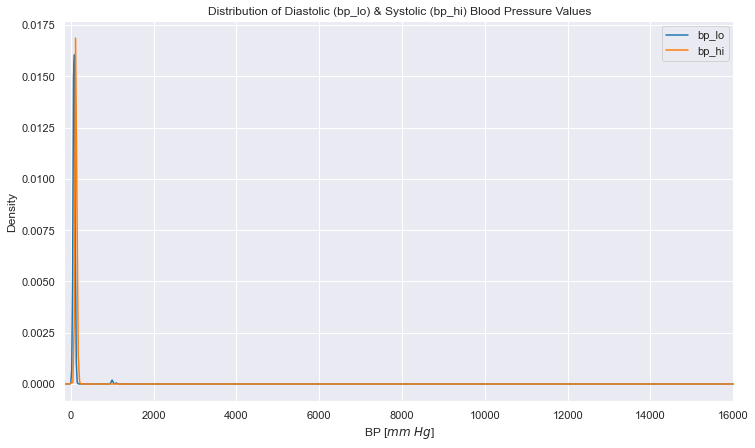

In [207]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values',
       xlabel=r'BP [$mm\ Hg$]',
       xlim=(min(df.bp_lo.min(), df.bp_hi.min()), max(df.bp_lo.max(), df.bp_hi.max())))
             
df.plot(y=['bp_lo', 'bp_hi'], 
        kind='density', 
        ax=ax)

<AxesSubplot:title={'center':'Distribution of Height Values'}, xlabel='Height [$cm$]', ylabel='Density'>

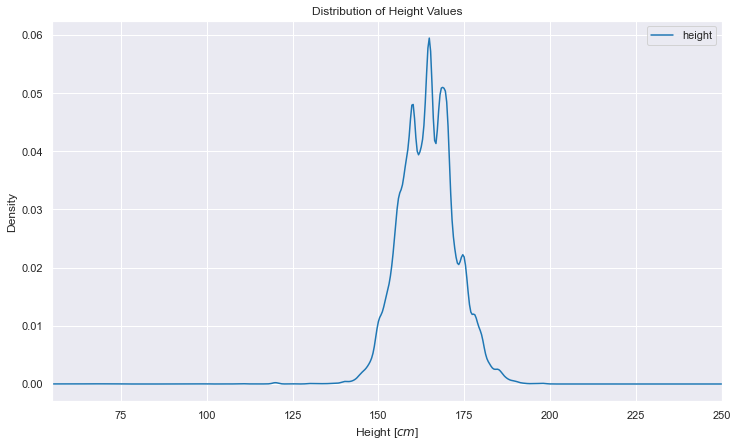

In [208]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Height Values',
       xlabel=r'Height [$cm$]',
       xlim=(min(df.height), max(df.height)))

df.plot(y='height', 
        kind='density',
        ax=ax) 

<AxesSubplot:title={'center':'Distribution of Weight Values'}, xlabel='Weight [$cm$]', ylabel='Density'>

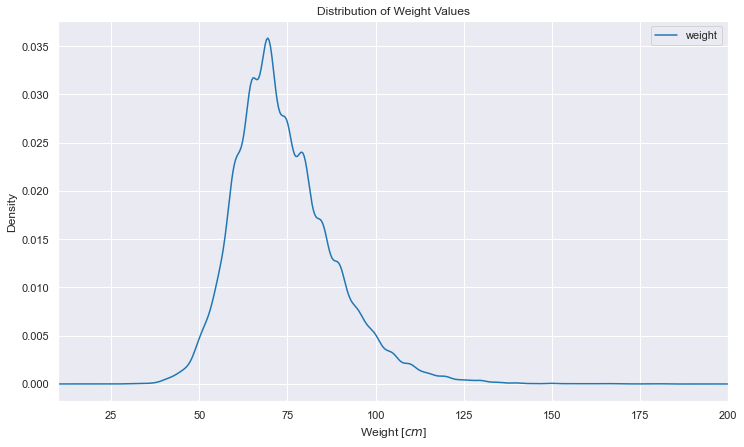

In [209]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Weight Values',
       xlabel=r'Weight [$cm$]',
       xlim=(min(df.weight), max(df.weight)))

df.plot(y='weight', 
        kind='density',
        ax=ax) 

> *The plots above confirm that these features have significant outliers that require removal. They also indicate that the `bp_lo`, `bp_hi`, `height`, and `weight` features are not normally distributed throughout the dataset:*
> - *`bp_lo`, `bp_hi` are extremely right-skewed*
> - *`height` is left-skewed with a jagged curve at the median* 
> - *`weight` is right-skewed with a jagged curve at the median* 

# C. *Data Preparation*

## C.1 - Data Cleaning

### *C.1.1 - Removing Entries Containing Negative Blood Pressure Values*

*It is reasonable to assume that negative blood pressure values are to be interpreted as null values, and the corresponding entries will therefore be discarded.*

In [210]:
df = df.loc[(df['bp_lo'] > 0) & (df['bp_hi'] > 0)]

### *C.1.2 - Removing Outliers*

> *Since `bp_lo`, `bp_hi`, `height`, and `weight` all have non-normal distributions, their outliers will be removed using the median as the measure of central tendency and IQR as the measure of dispersion.*.

In [211]:
def remove_outliers(df, *col_names, N=1.5, left_only=False, right_only=False):
    """
    Removes outliers in DataFrame columns using the IQR method.

    Arguments:
        df {pandas.DataFrame} -- [DataFrame to be passed in]
        col_names {Iterable[str]} -- [columns in `df` containing outliers to be removed]
        left_only {bool} -- only remove outliers with values less than the median
        right_only {bool} -- only remove outliers with values greater than the median
        
    Keyword Arguments:
        N {float} -- [factor that changes the width of the bounds used to determine outliers] (default: {1.5})

    Returns:
        df {pandas.DataFrame}
    """ 
    if left_only and right_only:
        raise ValueError("only one of <left_only, right_only> can be set to True")   
    for col in col_names:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        median = df[col].median()
        low_bound, high_bound = (median - N*IQR, median + N*IQR)
        if left_only:
            df = df.loc[(low_bound <= df[col])]
        elif right_only:
            df = df.loc[(df[col] <= high_bound)] 
        else:               
            df = df.loc[(low_bound <= df[col]) & (df[col] <= high_bound)]
    return df

#### *`bp_lo`* & *`bp_hi`*

<AxesSubplot:ylabel='Density'>

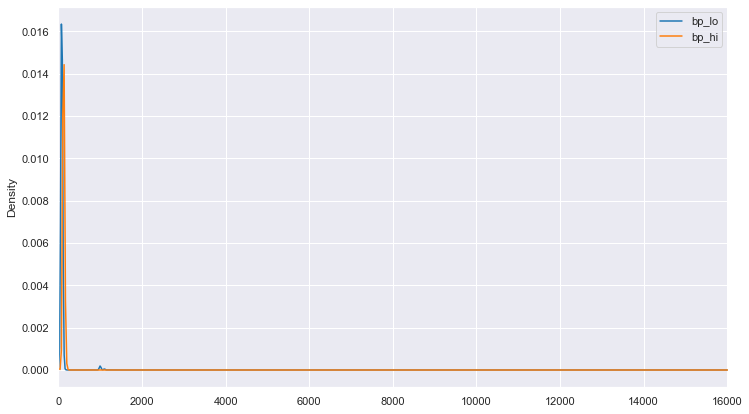

In [212]:
df.plot(y=['bp_lo', 'bp_hi'], 
        kind='density', 
        xlim=(0, max(df.bp_lo.max(), df.bp_hi.max())), 
        figsize=(12,7))

In [213]:
df = remove_outliers(df, 'bp_lo', 'bp_hi', N=2.5)

<AxesSubplot:title={'center':'Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values'}, xlabel='BP [$mm\\ Hg$]', ylabel='Density'>

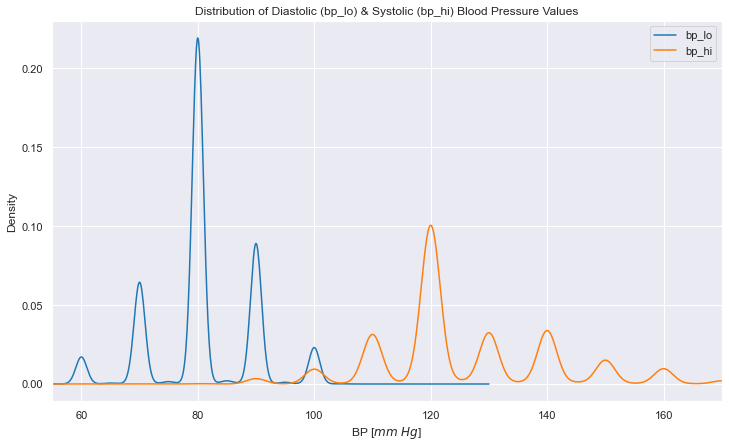

In [214]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values',
       xlabel=r'BP [$mm\ Hg$]',
       xlim=(min(df.bp_lo.min(), df.bp_hi.min()), max(df.bp_lo.max(), df.bp_hi.max())))
             
df.plot(y=['bp_lo', 'bp_hi'], 
        kind='density', 
        ax=ax)

In [215]:
df.shape

(66617, 12)

#### *`height`*

<AxesSubplot:title={'center':'Distribution of Height Values'}, xlabel='Height [$cm$]', ylabel='Density'>

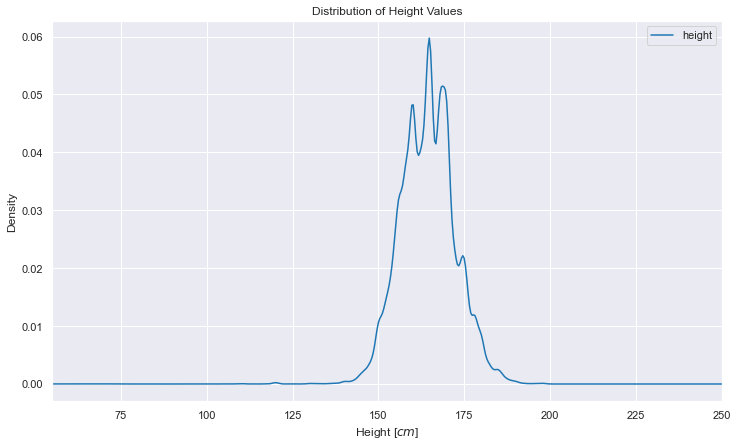

In [216]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Height Values',
       xlabel=r'Height [$cm$]',
       xlim=(min(df.height), max(df.height)))

df.plot(y='height', 
        kind='density',
        ax=ax) 

In [217]:
df = remove_outliers(df, 'height', N=3)

<AxesSubplot:title={'center':'Distribution of Height Values'}, xlabel='Height [$cm$]', ylabel='Density'>

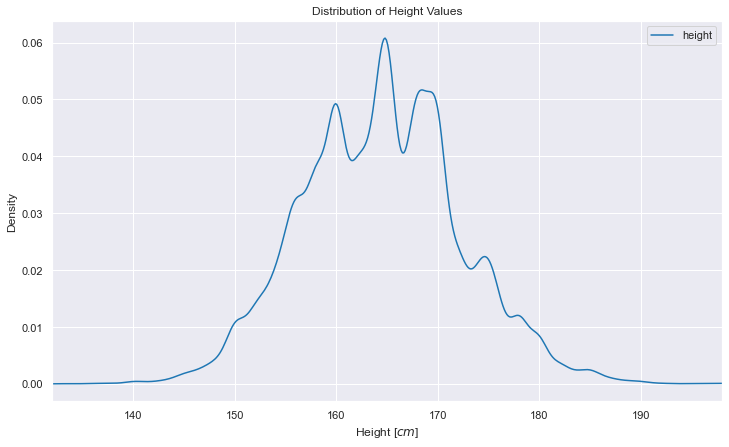

In [218]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Height Values',
       xlabel=r'Height [$cm$]',
       xlim=(min(df.height), max(df.height)))

df.plot(y='height', 
        kind='density',
        ax=ax) 

In [219]:
df.shape

(66518, 12)

#### *`weight`*

<AxesSubplot:title={'center':'Distribution of Weight Values'}, xlabel='Weight [$kg$]', ylabel='Density'>

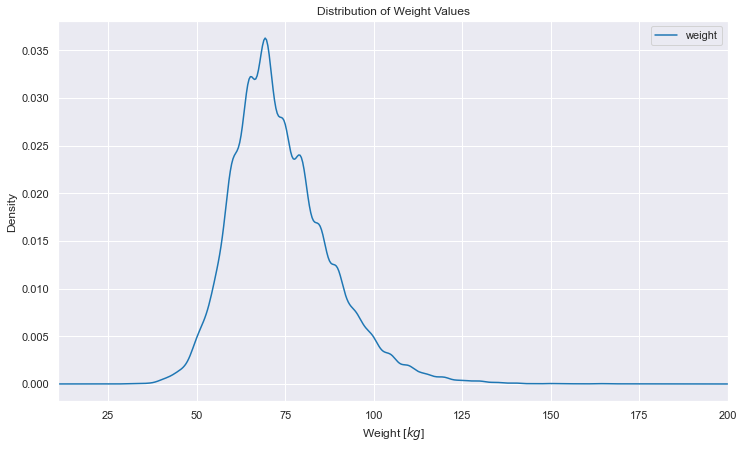

In [220]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Weight Values',
       xlabel=r'Weight [$kg$]',
       xlim=(min(df.weight), max(df.weight)))

df.plot(y='weight', 
        kind='density',
        ax=ax) 

*As discussed in *Section B*, the distribution of weights only contains abnormally low values. Therefore, only outliers to the left of the median will be removed.*

In [221]:
df = remove_outliers(df, 'weight', N=2.5, left_only=True)

<AxesSubplot:title={'center':'Distribution of Weight Values'}, xlabel='Weight [$kg$]', ylabel='Density'>

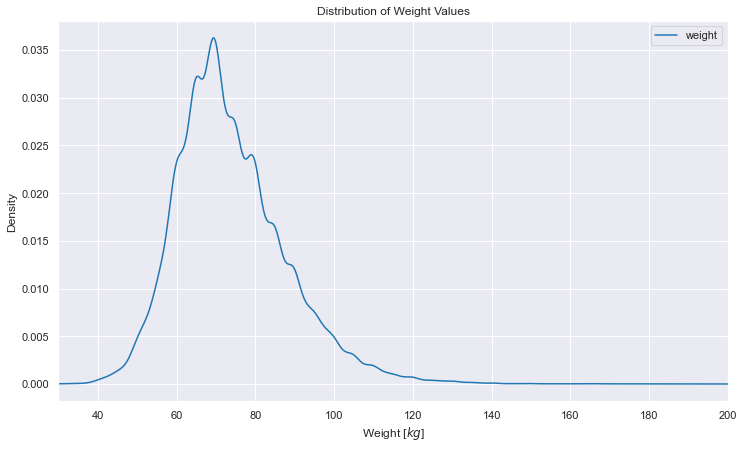

In [222]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Weight Values',
       xlabel=r'Weight [$kg$]',
       xlim=(min(df.weight), max(df.weight)))

df.plot(y='weight', 
        kind='density',
        ax=ax) 

In [223]:
df.shape

(66513, 12)

## C.2 - Feature Engineering

In [224]:
df = df.reset_index(drop=True)

In [225]:
y = df["cardio"]
X = df.drop(columns="cardio")

In [226]:
X.shape, y.shape

((66513, 11), (66513,))

### *C.2.1 - Creating the __`bmi`__ and __`bmi_category`__ Features*

> *__Obesity is known to have a causal link with cardiovascular disease.__ This condition is categorized by a patient's __Body Mass Index (BMI)__ for each patient in the dataset, and then using this BMI to determine the patient's weight category.* 

> - *BMI will be calculated using the following formula:* 
> $$ BMI = \dfrac{weight(kg)}{[height(m)]^2} $$
> - *Using BMI, a patient's weight class will be determined from the following table:*
<br>
> <center><img src="./images/obesity_index.jpg" width='400'></center>

In [227]:
X['bmi'] = X.weight / (X.height/100)**2

In [228]:
X.drop(columns=['weight', 'height'], inplace=True)

In [229]:
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif (18.5 <= bmi < 25):
        return 'normal'
    elif (25 <= bmi < 30):
        return 'overweight'
    elif (30 <= bmi < 35):
        return 'obese'
    elif (35 <= bmi < 40):
        return 'severley obese'
    else:
        return 'morbidly obese'

In [230]:
X['bmi_category'] = X['bmi'].apply(get_bmi_category) 
X['bmi_category'] = pd.Categorical(X['bmi_category'], 
                                   ordered=True, 
                                   categories=['underweight', 
                                               'normal', 
                                               'overweight', 
                                               'obese', 
                                               'severley obese', 
                                               'morbidly obese'])

X['bmi_category'].value_counts().sort_index(ascending=True)

underweight         619
normal            24941
overweight        23916
obese             11461
severley obese     3998
morbidly obese     1578
Name: bmi_category, dtype: int64

### *C.2.2 - Creating the __`bp_category`__ Feature*

> *__Hypertension is also known to have a causal link with cardiovascular disease.__ This condition is categorized a patient's blood pressure level, which will be determined from the following table:*
<br>
> <center><img src="images/bp_index.jpg" width='600'></center>


In [231]:
def get_bp_category(bp):
    bp_hi, bp_lo = bp
    if (bp_hi < 120 and bp_lo < 80):
        return 'normal'
    elif (120 <= bp_hi < 130) and (bp_lo < 80):
        return 'elevated'
    elif (130 <= bp_hi < 140) or (80 <= bp_lo < 90):
        return 'hypertension (stage 1)'
    else:
        return 'hypertension (stage 2)'

In [232]:
X['bp_category'] = X[['bp_hi', 'bp_lo']].apply(lambda x: tuple(x), axis=1).apply(get_bp_category)
X['bp_category'] = pd.Categorical(X['bp_category'], ordered=True, categories=['normal', 'elevated', 'hypertension (stage 1)', 'hypertension (stage 2)'])
X['bp_category'].value_counts().sort_index(ascending=True) 

normal                     9393
elevated                   3062
hypertension (stage 1)    39256
hypertension (stage 2)    14802
Name: bp_category, dtype: int64

## C.3 - Extracting the Training, Validation, and Testing Sets

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X['gender'] = pd.Categorical(X['gender'].map({1: 'male', 2: 'female'}))
X['gender'].value_counts()

male      43416
female    23097
Name: gender, dtype: int64

In [235]:
X['cholesterol'] = pd.Categorical(X['cholesterol'].map({1: 'normal', 2: 'high', 3: 'very high'}), ordered=True, categories=['normal', 'high', 'very high'])
X['cholesterol'].value_counts().sort_index(ascending=True)

normal       50141
high          8868
very high     7504
Name: cholesterol, dtype: int64

In [236]:
X['glucose'] = pd.Categorical(X['glucose'].map({1: 'normal', 2: 'high', 3: 'very high'}), ordered=True, categories=['normal', 'high', 'very high'])
X['glucose'].value_counts().sort_index(ascending=True)

normal       56694
high          4807
very high     5012
Name: glucose, dtype: int64

*The normalized value counts of the target array shown below indicate there is a roughly equal number of each label. Therefore, sampling will not need to be performed.*

In [237]:
y.value_counts(normalize=True)

0    0.512291
1    0.487709
Name: cardio, dtype: float64

In [238]:
X_train, X_validate_and_test, y_train, y_validate_and_test = train_test_split(X, y, random_state=0, test_size=0.20)
X_test, X_validate, y_test, y_validate = train_test_split(X_validate_and_test, y_validate_and_test, random_state=0, test_size=0.50)

In [239]:
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)
print(X_test.shape, y_test.shape)

(53210, 12) (53210,)
(6652, 12) (6652,)
(6651, 12) (6651,)


## C.4 - One Hot Encoding the Categorical Features

In [240]:
from sklearn.preprocessing import OneHotEncoder

In [241]:
X_train_num = X_train.select_dtypes(exclude='category')
X_train_cat = X_train.select_dtypes(include='category')

ohe_train = OneHotEncoder(sparse=False, dtype='int64')
ohe_train.fit(X_train_cat)
ohe_train_cols = ohe_train.get_feature_names(input_features=X_train_cat.columns)
X_train_cat = pd.DataFrame(ohe_train.transform(X_train_cat), columns=ohe_train_cols)
cat_cols = [col.replace(' ', '-').replace('(', '').replace(')', '') for col in ohe_train_cols]
X_train_cat.columns = cat_cols

X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63822 entries, 0 to 66510
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               53210 non-null  float64
 1   bp_hi                             53210 non-null  float64
 2   bp_lo                             53210 non-null  float64
 3   smoke                             53210 non-null  float64
 4   alcohol                           53210 non-null  float64
 5   active                            53210 non-null  float64
 6   bmi                               53210 non-null  float64
 7   gender_female                     53210 non-null  float64
 8   gender_male                       53210 non-null  float64
 9   cholesterol_high                  53210 non-null  float64
 10  cholesterol_normal                53210 non-null  float64
 11  cholesterol_very-high             53210 non-null  float64
 12  gluc

In [242]:
X_validate_num = X_validate.select_dtypes(exclude='category')
X_validate_cat = X_validate.select_dtypes(include='category')

ohe_validate = OneHotEncoder(sparse=False, dtype='int64')
ohe_validate.fit(X_validate_cat)
ohe_validate_cols = ohe_validate.get_feature_names(input_features=X_validate_cat.columns)
X_validate_cat = pd.DataFrame(ohe_validate.transform(X_validate_cat), columns=ohe_validate_cols)
cat_cols = [col.replace(' ', '-').replace('(', '').replace(')', '') for col in ohe_validate_cols]
X_validate_cat.columns = cat_cols

X_validate = pd.concat([X_validate_num, X_validate_cat], axis=1)
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12632 entries, 0 to 66512
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6652 non-null   float64
 1   bp_hi                             6652 non-null   float64
 2   bp_lo                             6652 non-null   float64
 3   smoke                             6652 non-null   float64
 4   alcohol                           6652 non-null   float64
 5   active                            6652 non-null   float64
 6   bmi                               6652 non-null   float64
 7   gender_female                     6652 non-null   float64
 8   gender_male                       6652 non-null   float64
 9   cholesterol_high                  6652 non-null   float64
 10  cholesterol_normal                6652 non-null   float64
 11  cholesterol_very-high             6652 non-null   float64
 12  gluc

In [243]:
X_test_num = X_test.select_dtypes(exclude='category')
X_test_cat = X_test.select_dtypes(include='category')

ohe_test = OneHotEncoder(sparse=False, dtype='int64')
ohe_test.fit(X_test_cat)
ohe_test_cols = ohe_test.get_feature_names(input_features=X_test_cat.columns)
X_test_cat = pd.DataFrame(ohe_test.transform(X_test_cat), columns=ohe_test_cols)
cat_cols = [col.replace(' ', '-').replace('(', '').replace(')', '') for col in ohe_test_cols]
X_test_cat.columns = cat_cols

X_test = pd.concat([X_test_num, X_test_cat], axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12691 entries, 0 to 66511
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6651 non-null   float64
 1   bp_hi                             6651 non-null   float64
 2   bp_lo                             6651 non-null   float64
 3   smoke                             6651 non-null   float64
 4   alcohol                           6651 non-null   float64
 5   active                            6651 non-null   float64
 6   bmi                               6651 non-null   float64
 7   gender_female                     6651 non-null   float64
 8   gender_male                       6651 non-null   float64
 9   cholesterol_high                  6651 non-null   float64
 10  cholesterol_normal                6651 non-null   float64
 11  cholesterol_very-high             6651 non-null   float64
 12  gluc

## C.5 - Normalizing the Predictors

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_validate = pd.DataFrame(scaler.transform(X_validate), columns=X_validate.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# D. *Modeling*

In [202]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict
from classifier_utils import validate, plot_validation_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
import pickle

## D.1 - Creating a Custom Scorer

In [126]:
from sklearn.metrics import fbeta_score, make_scorer

def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='binary')

f2 = make_scorer(f2_score)

## D.2 - Randomized Forest 

In [127]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [128]:
def avg_depth(rfc):
    return round(np.average([dt.get_depth() for dt in rfc.estimators_]), 0)

### *D.2.1- Optimizing the Maximum Depth (`max_depth`)*

*Specifying the maximum depth of `rfc` limits the growth of its decision trees and prevents overfitting to the training set. The `max_depth` parameter will be optimized for this purpose.*

*The plot below shows how the validation metrics change as the maximum depth of `rfc` increases:*

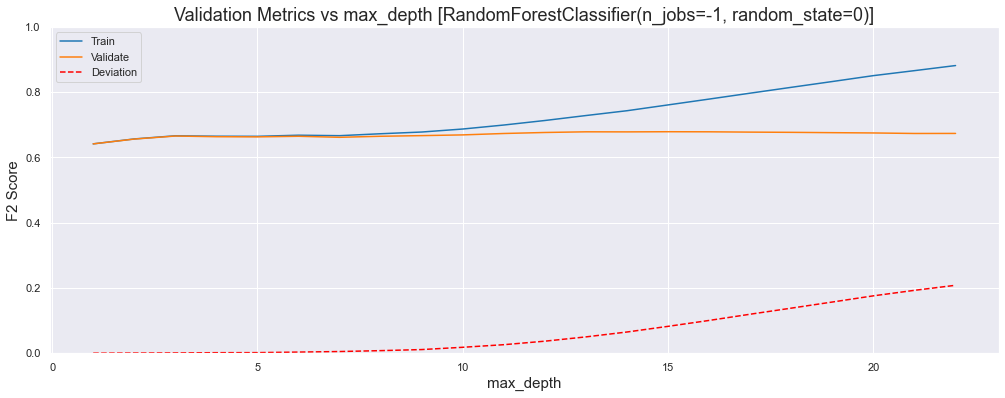

In [129]:
plot_validation_curve(rfc, X_train, y_train, param_name='max_depth', param_range=np.arange(1, avg_depth(rfc)/2)) 

*The plots above indicate that overfitting begins to occur in `rfc` when its decision tress reach an average depth of 9 nodes. Therefore, to reduce overfitting, the maximum depth of `rfc` will manually be set to 9 in accordance to the validation metrics above.*

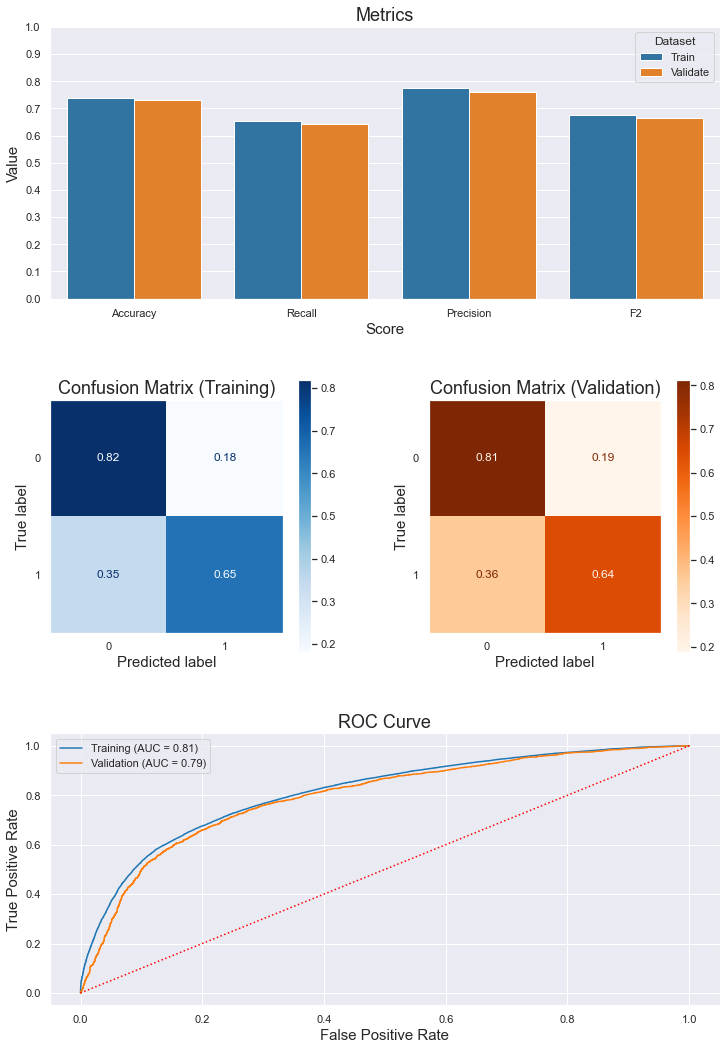

In [130]:
rfc.max_depth = 9    
validate(rfc, X_train, X_validate, y_train, y_validate)

*The validation metrics above confirm that a maximum depth of 10 leads to a minimum in the training loss of `rfc`.*

In [131]:
rfc_bestMaxDepth_1 = RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=0)
rfc_bestMaxDepth_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=0)

### *D.2.2 - Optimizing the Minimum Number of Samples per Leaf (`min_samples_leaf`)*

*Specifying the minimum samples required for a node to be considered a leaf is an alternative way to reduce overfitting in tree-based models.* 

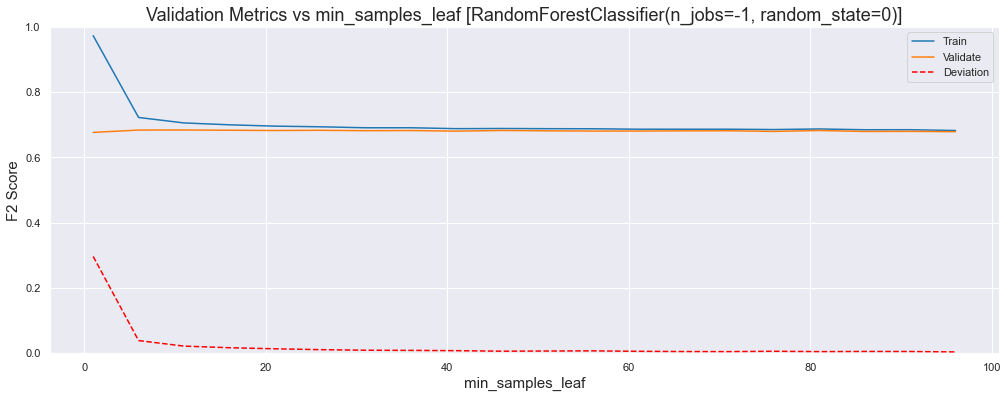

In [132]:
rfc.max_depth = None
plot_validation_curve(rfc, X_train, y_train, param_name='min_samples_leaf', param_range=np.arange(1, 101, 5)) 

In [133]:
min_samples_leaf_params = np.arange(20, 61)

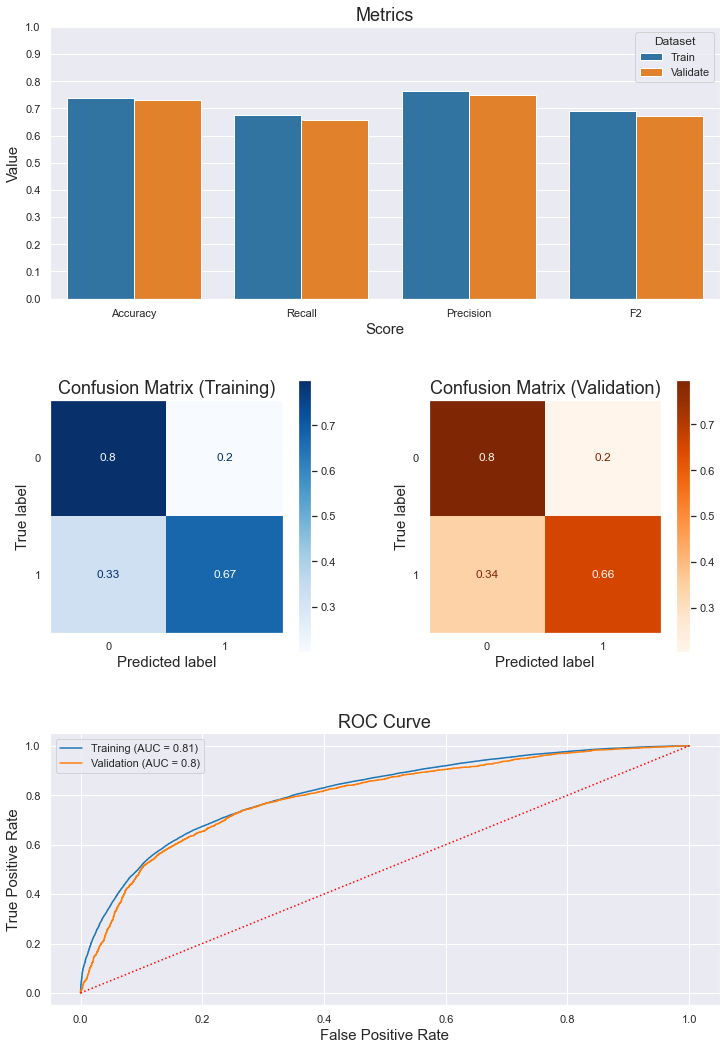

In [134]:
rfc.max_depth = None
rfc_params = {'min_samples_leaf': min_samples_leaf_params}

rfc_grid = GridSearchCV(rfc, 
                        rfc_params,
                        scoring=f2, 
                        n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [135]:
rfc_bestMinSamplesLeaf_1 = rfc_grid.best_estimator_
rfc_bestMinSamplesLeaf_1

RandomForestClassifier(min_samples_leaf=35, n_jobs=-1, random_state=0)

In [136]:
rfc_bestMinSamplesLeaf_1 = RandomForestClassifier(min_samples_leaf=35, n_jobs=-1, random_state=0)
rfc_bestMinSamplesLeaf_1.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=35, n_jobs=-1, random_state=0)

*The validation metrics above confirm that a minimum of 35 samples per leaf leads to a minimum in the training loss of `rfc`.*

## D.3 - Feature Importances

In [137]:
from sklearn.inspection import permutation_importance

*The plots below show the impurity-based and permutation-based feature importances for both `rfc_bestMaxDepth` and `rfc_bestMinSamplesLeaf`:*

[Text(0.5, 0, 'Mean Decrease in Precision')]

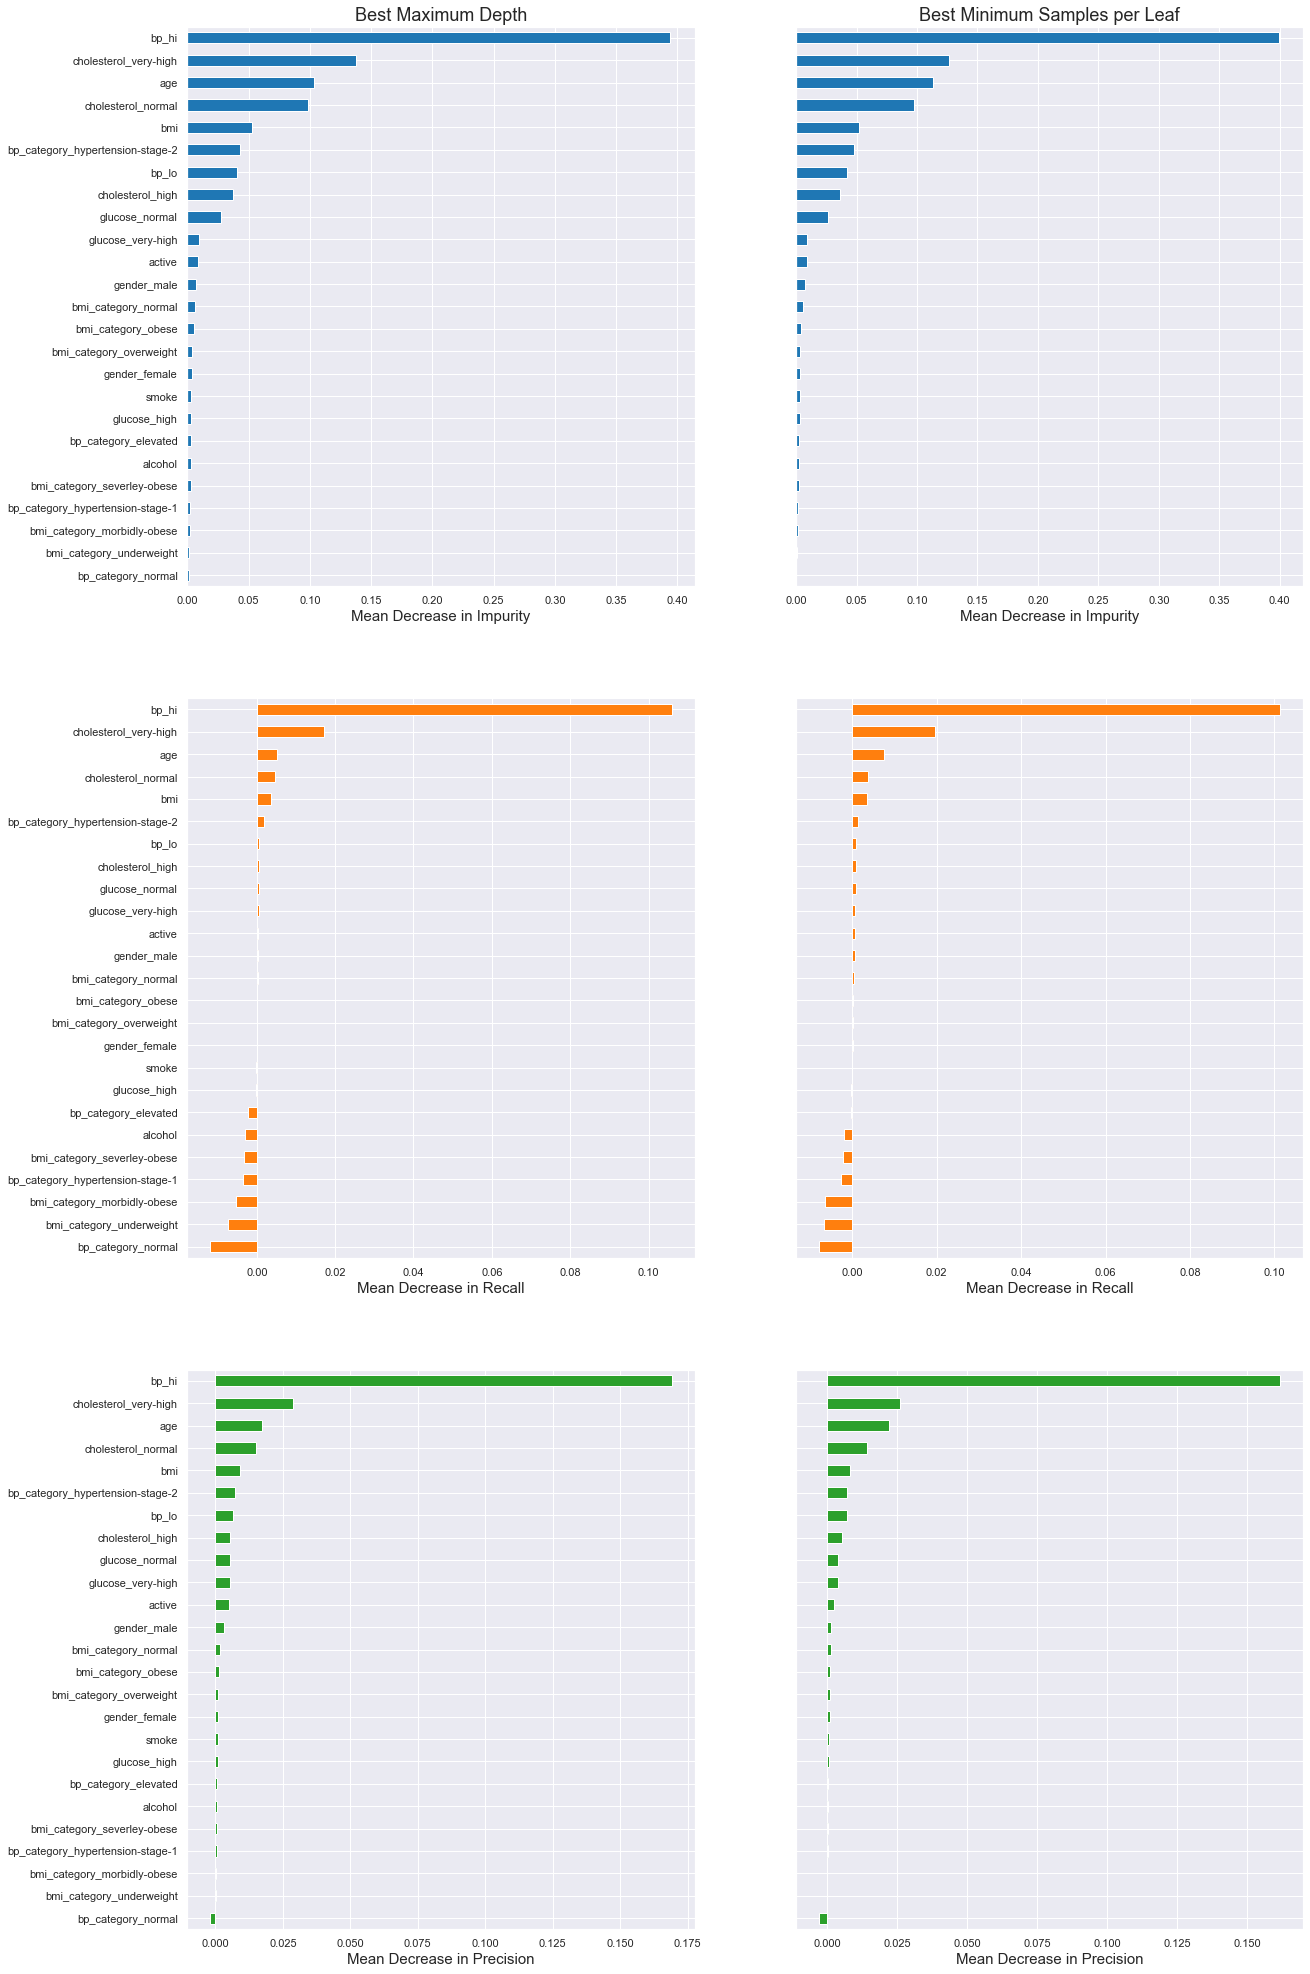

In [138]:
rfc_bestMaxDepth = rfc_bestMaxDepth_1
rfc_bestMinSamplesLeaf = rfc_bestMinSamplesLeaf_1

rfc_bestMaxDepth_impurity_importances = pd.Series(rfc_bestMaxDepth.feature_importances_, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_impurity_importances = pd.Series(rfc_bestMinSamplesLeaf.feature_importances_, index=X.columns).sort_values()

bestMaxDepth_feature_recall_scores = permutation_importance(rfc_bestMaxDepth, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)
bestMinSamplesLeaf_feature_recall_scores = permutation_importance(rfc_bestMinSamplesLeaf, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)

rfc_bestMaxDepth_recall_importances = pd.Series(bestMaxDepth_feature_recall_scores.importances_mean, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_recall_importances = pd.Series(bestMinSamplesLeaf_feature_recall_scores.importances_mean, index=X.columns).sort_values()

bestMaxDepth_feature_precision_scores = permutation_importance(rfc_bestMaxDepth, X_train, y_train, scoring='precision', n_repeats=10, random_state=0, n_jobs=-1)
bestMinSamplesLeaf_feature_precision_scores = permutation_importance(rfc_bestMinSamplesLeaf, X_train, y_train, scoring='precision', n_repeats=10, random_state=0, n_jobs=-1)

rfc_bestMaxDepth_precision_importances = pd.Series(bestMaxDepth_feature_precision_scores.importances_mean, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_precision_importances = pd.Series(bestMinSamplesLeaf_feature_precision_scores.importances_mean, index=X.columns).sort_values()

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,35), sharey=True)

rfc_bestMaxDepth_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][0])
rfc_bestMinSamplesLeaf_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][1])

rfc_bestMaxDepth_recall_importances.plot(kind='barh', color='tab:orange', ax=axes[1][0])
rfc_bestMinSamplesLeaf_recall_importances.plot(kind='barh', color='tab:orange', ax=axes[1][1])

rfc_bestMaxDepth_precision_importances.plot(kind='barh', color='tab:green', ax=axes[2][0])
rfc_bestMinSamplesLeaf_precision_importances.plot(kind='barh', color='tab:green', ax=axes[2][1])

axes[0][0].set(title='Best Maximum Depth', xlabel='Mean Decrease in Impurity')
axes[0][1].set(title='Best Minimum Samples per Leaf', xlabel='Mean Decrease in Impurity')
axes[1][0].set(xlabel='Mean Decrease in Recall')
axes[1][1].set(xlabel='Mean Decrease in Recall')
axes[2][0].set(xlabel='Mean Decrease in Precision')
axes[2][1].set(xlabel='Mean Decrease in Precision')

## D.4 - Feature Processing Based on Importance

It can be concluded from the plots displaying impurity-based importances that the tree-based models implemented above are struggling to split the one-hot encoded features that were engineered in *Part C* (i.e. the `bmi_category` and `bp_category` columns) because they have too many levels. This, in turn, means that only a small fraction of the data belongs to some of these levels, and the corresponding one-hot encoded columns will mostly contain zeros. It follows that splitting on this column produces a relatively small reduction in impurity, causing the tree-based algorithms to ignore these columns in favor of others. 

With respect to the plots displaying permutation-based importances, it can also be seen that the `severley-obese`, `morbidly-obese`, and `underweight` levels of `bmi_category`, along with the `normal`, `elevated`, and `hypertension-stage-1` levels of `bp_category`, are actually detrimental to the recall of both models, since the recall scores for both `rfc_bestMaxDepth` and `rfc_bestMinSamplesLeaf` increases upon permutation of these categories.  

To alleviate these problems, the levels belonging to `bmi_category` and `bp_category` will be grouped together in a way that maximizes the importance of each level.

> *In the figure above, it is obvious that the BMI levels need to be grouped such that the `overweight`, `severley-obese`, `morbidly-obese`, and `underweight` levels are eliminated. As a result, the BMI levels will be grouped as:*
> - **`not-obese` = {`underweight + normal`, `overweight`}**
> - **`obese` = {`obese + severley-obese + morbidly-obese`}**

> *The grouped columns above will be then merged into a single binary column called **`obese`**.*

In [139]:
X['bmi_category_not-obese'] = X['bmi_category_underweight'] + X['bmi_category_normal'] + X['bmi_category_overweight']
X.drop(columns=['bmi_category_underweight', 'bmi_category_normal', 'bmi_category_overweight'], inplace=True)

In [140]:
X['bmi_category_obese'] = X['bmi_category_obese'] + X['bmi_category_severley-obese'] + X['bmi_category_morbidly-obese']
X.drop(columns=['bmi_category_severley-obese', 'bmi_category_morbidly-obese'], inplace=True)

In [141]:
X.drop(columns='bmi_category_not-obese', inplace=True)
X.rename(columns={'bmi_category_obese': 'obese'}, inplace=True)

> *Similarly, the figure above shows that the BP levels need to be grouped such that the `normal`, `elevated`, and `hypertension-stage-1` levels are eliminated. As a result, the BP levels will be grouped as:*
> - **`not-hypertension-stage-2` = {`normal` + `elevated`}**
> - **`hypertensive` = {`hypertension-stage-1` + `hypertension-stage-2`}**

> *The grouped columns above will be then merged into a single binary column called **`hypertension`**.*

In [142]:
X['bp_category_not-hypertensive'] = X['bp_category_normal'] + X['bp_category_elevated']
X.drop(columns=['bp_category_normal', 'bp_category_elevated'], inplace=True)

In [143]:
X['bp_category_hypertensive'] = X['bp_category_hypertension-stage-1'] + X['bp_category_hypertension-stage-2']
X.drop(columns=['bp_category_hypertension-stage-1', 'bp_category_hypertension-stage-2'], inplace=True)

In [144]:
X.drop(columns='bp_category_not-hypertensive', inplace=True)
X.rename(columns={'bp_category_hypertensive': 'hypertension'}, inplace=True)

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66513 entries, 0 to 66512
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    66513 non-null  int64  
 1   bp_hi                  66513 non-null  int64  
 2   bp_lo                  66513 non-null  int64  
 3   smoke                  66513 non-null  int64  
 4   alcohol                66513 non-null  int64  
 5   active                 66513 non-null  int64  
 6   bmi                    66513 non-null  float64
 7   gender_female          66513 non-null  int64  
 8   gender_male            66513 non-null  int64  
 9   cholesterol_high       66513 non-null  int64  
 10  cholesterol_normal     66513 non-null  int64  
 11  cholesterol_very-high  66513 non-null  int64  
 12  glucose_high           66513 non-null  int64  
 13  glucose_normal         66513 non-null  int64  
 14  glucose_very-high      66513 non-null  int64  
 15  ob

### *Extracting the New Training, Testing, and Validation Sets*

In [146]:
X_train, X_validate_and_test, y_train, y_validate_and_test = train_test_split(X, y, random_state=0, test_size=0.20)
X_test, X_validate, y_test, y_validate = train_test_split(X_validate_and_test, y_validate_and_test, random_state=0, test_size=0.50)

In [147]:
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)
print(X_test.shape, y_test.shape)

(53210, 17) (53210,)
(6652, 17) (6652,)
(6651, 17) (6651,)


### *Normalizing the Adjusted Predictors*

In [148]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_validate = pd.DataFrame(scaler.transform(X_validate), columns=X_validate.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## D.5 - Randomized Forest (*Iteration 2*)

In [149]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

### *D.5.1 - Optimizing the Maximum Depth (`max_depth`)*

*The plot below shows how the validation metrics change as the maximum depth of `rfc` increases:*

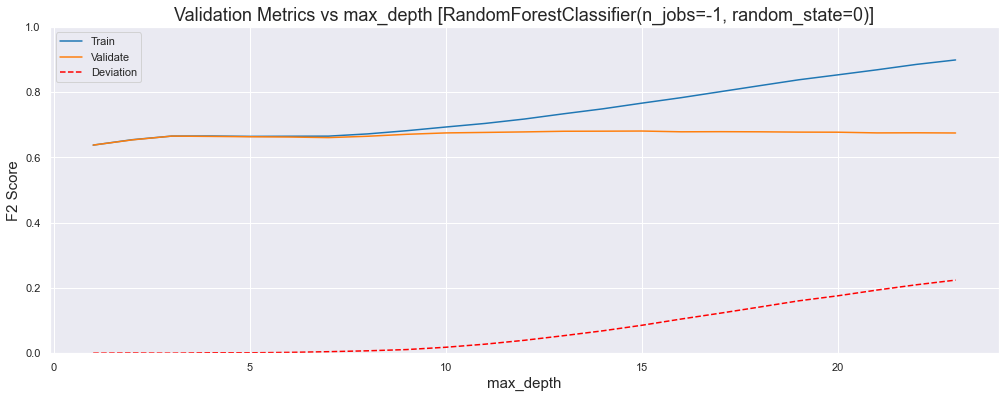

In [150]:
plot_validation_curve(rfc,  X_train, y_train, param_name='max_depth', param_range=np.arange(1, avg_depth(rfc)/2))

*The plots above indicate that overfitting begins to occur in `rfc` when its decision tress reach an average depth of 8 nodes. Therefore, to reduce overfitting, the maximum depth of `rfc` will manually be set to 8 in accordance to the validation metrics above.*

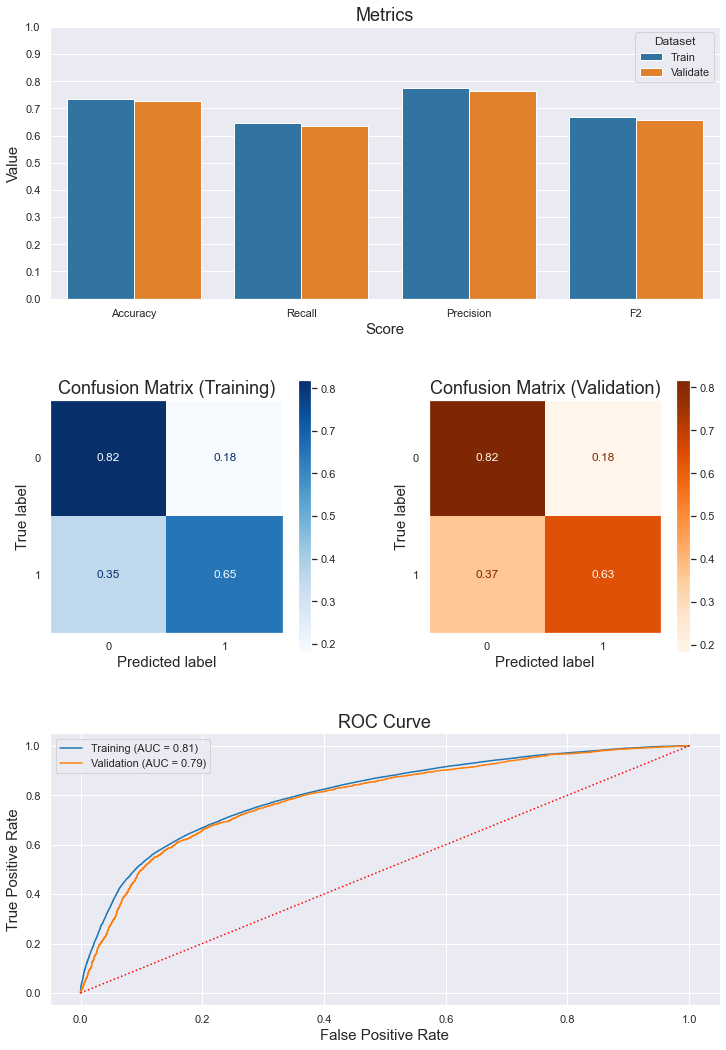

In [151]:
rfc.max_depth = 8
validate(rfc, X_train, X_validate, y_train, y_validate)

*The validation metrics above confirm that a maximum depth of 8 leads to a minimum in the training loss of `rfc`.*

In [152]:
rfc_bestMaxDepth_2 = RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=0)
rfc_bestMaxDepth_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=0)

### Optimizing the Minimum Number of Samples per leaf (`min_samples_leaf`)

*The plot below shows how the validation metrics change as the minimum samples required for a node in `rfc` to become a leaf increases:*

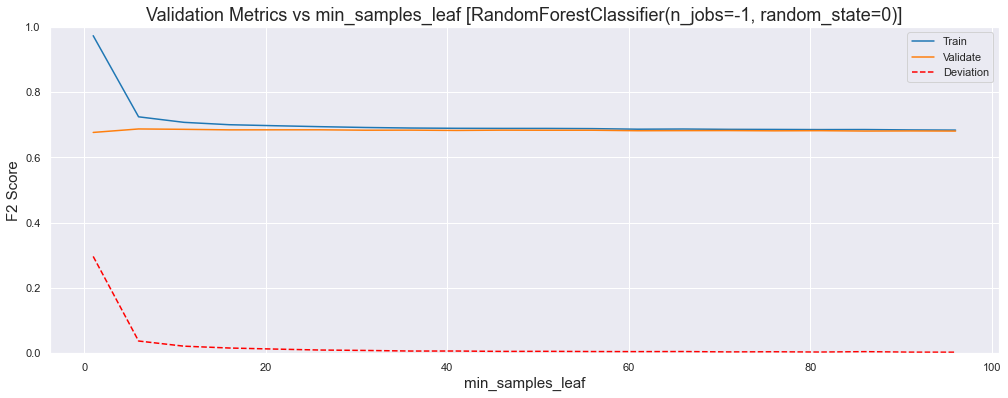

In [153]:
rfc.max_depth = None
plot_validation_curve(rfc, X_train, y_train, param_name='min_samples_leaf', param_range=np.arange(1, 101, 5)) 

*The plot above indicate that overfitting becomes negligible in `rfc` when the minimum samples required for a leaf node reaches a value of around 30. Therefore, to reduce overfitting, a grid search will be performed with a starting value of 30 for `min_samples_leaf`.*

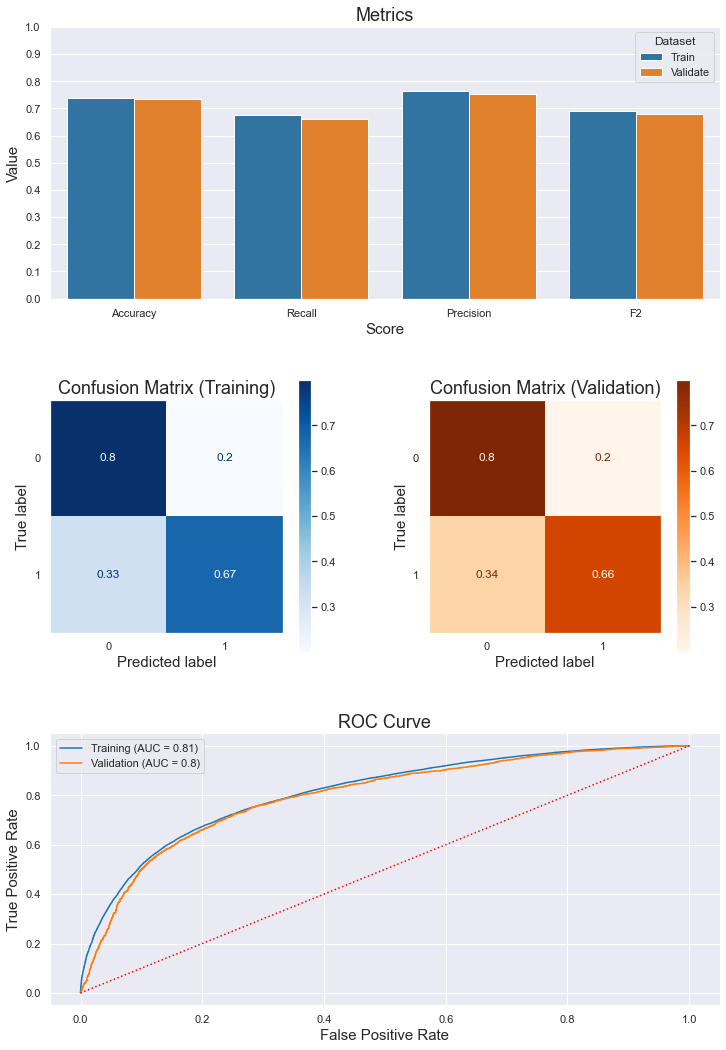

In [154]:
rfc.max_depth = None
rfc_params = {'min_samples_leaf': np.arange(30, 60)}

rfc_grid = GridSearchCV(rfc, 
                        rfc_params,
                        scoring=f2, 
                        n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [155]:
rfc_bestMinSamplesLeaf_2 = rfc_grid.best_estimator_
rfc_bestMinSamplesLeaf_2

RandomForestClassifier(min_samples_leaf=39, n_jobs=-1, random_state=0)

In [156]:
rfc_bestMinSamplesLeaf_2 = RandomForestClassifier(min_samples_leaf=39, n_jobs=-1, random_state=0)
rfc_bestMinSamplesLeaf_2.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=39, n_jobs=-1, random_state=0)

*The validation metrics above confirm that a minimum of 39 samples per leaf leads to a minimum in the training loss of `rfc`.*

## D.6 - Updated Feature Importances

[Text(0.5, 0, 'Mean Decrease in Precision')]

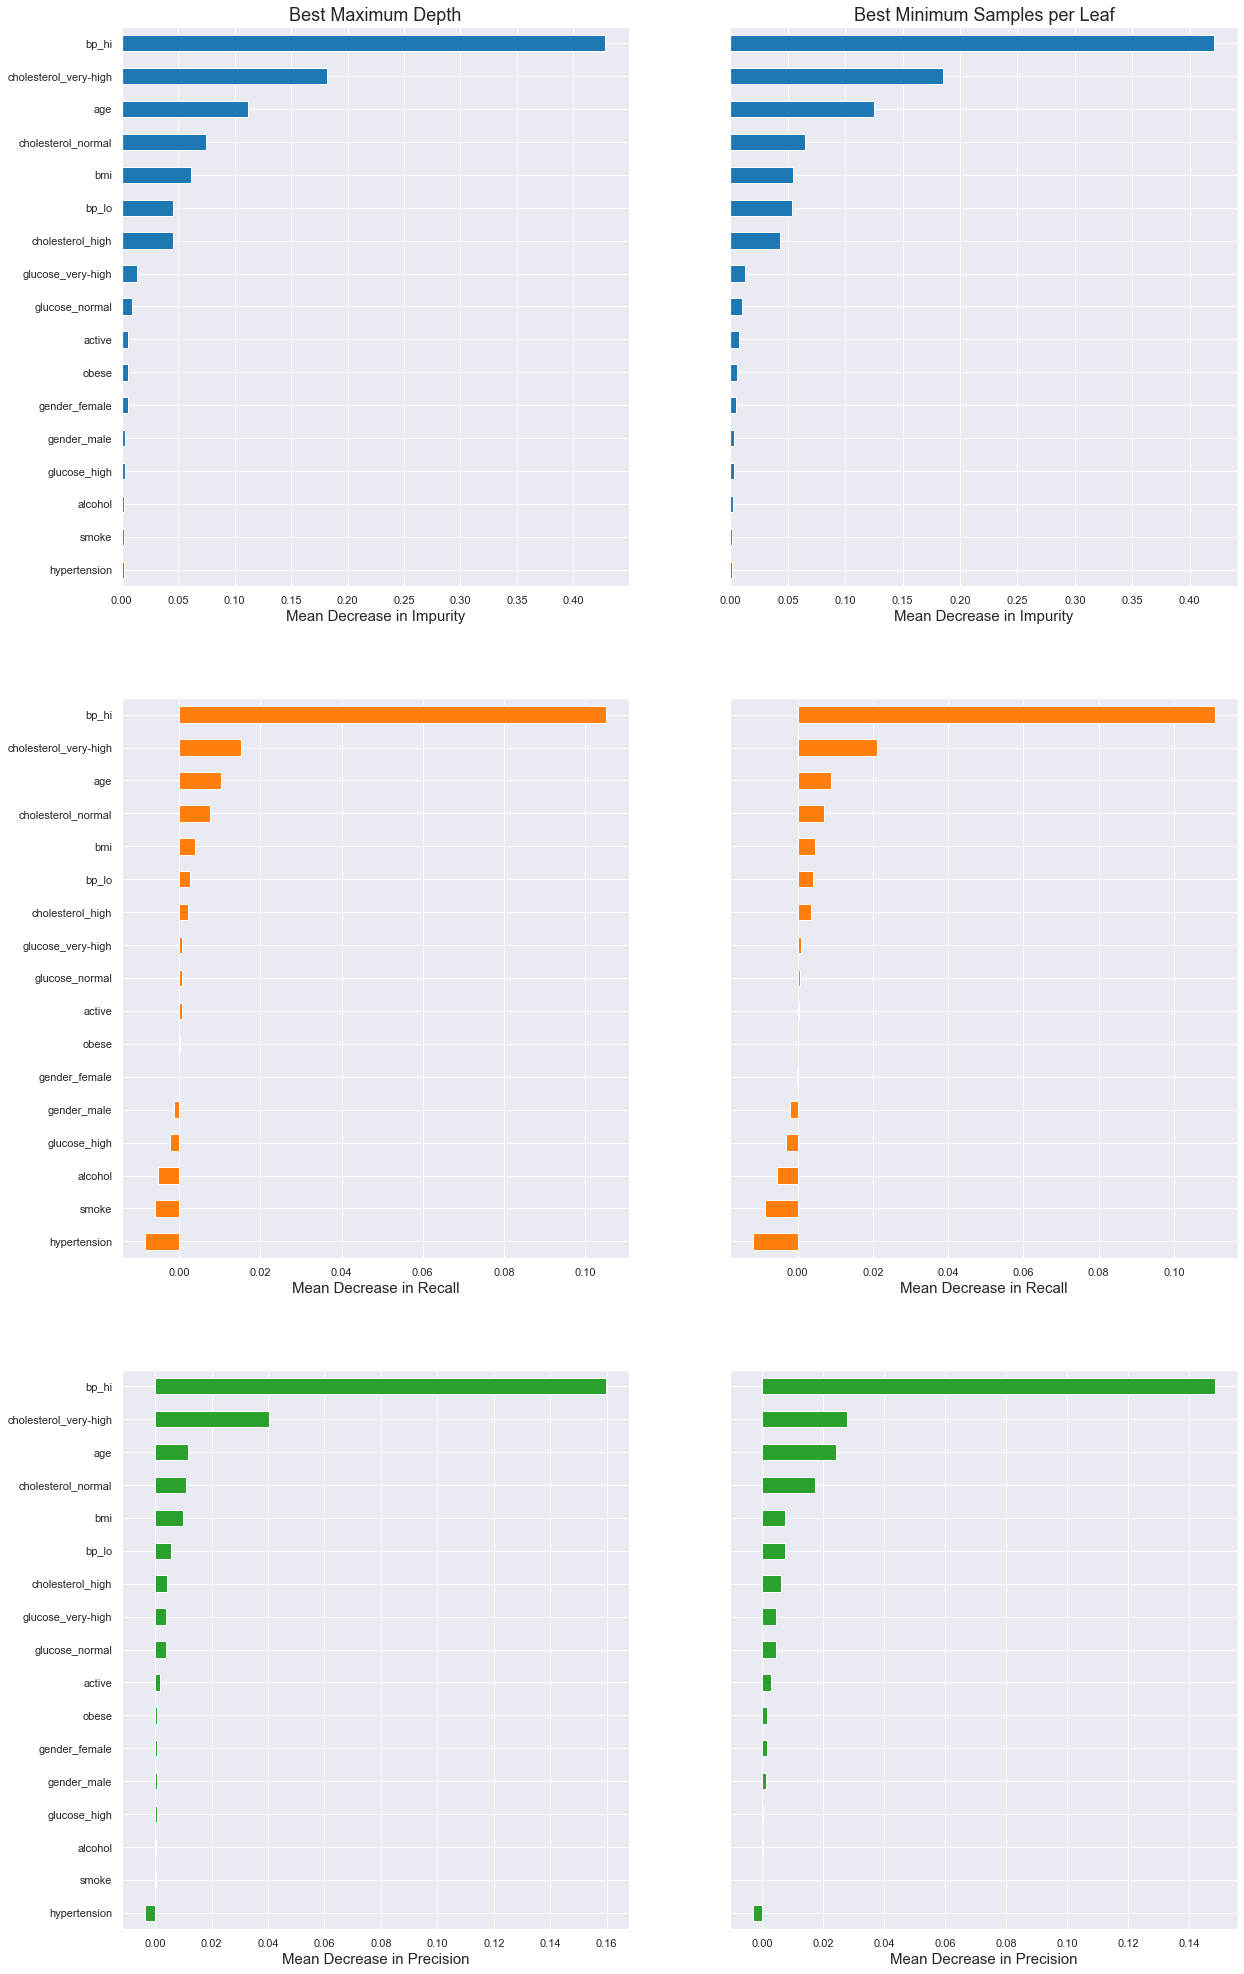

In [157]:
rfc_bestMaxDepth = rfc_bestMaxDepth_2
rfc_bestMinSamplesLeaf = rfc_bestMinSamplesLeaf_2

rfc_bestMaxDepth_impurity_importances = pd.Series(rfc_bestMaxDepth.feature_importances_, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_impurity_importances = pd.Series(rfc_bestMinSamplesLeaf.feature_importances_, index=X.columns).sort_values()

bestMaxDepth_feature_recall_scores = permutation_importance(rfc_bestMaxDepth, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)
bestMinSamplesLeaf_feature_recall_scores = permutation_importance(rfc_bestMinSamplesLeaf, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)

rfc_bestMaxDepth_recall_importances = pd.Series(bestMaxDepth_feature_recall_scores.importances_mean, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_recall_importances = pd.Series(bestMinSamplesLeaf_feature_recall_scores.importances_mean, index=X.columns).sort_values()

bestMaxDepth_feature_precision_scores = permutation_importance(rfc_bestMaxDepth, X_train, y_train, scoring='precision', n_repeats=10, random_state=0, n_jobs=-1)
bestMinSamplesLeaf_feature_precision_scores = permutation_importance(rfc_bestMinSamplesLeaf, X_train, y_train, scoring='precision', n_repeats=10, random_state=0, n_jobs=-1)

rfc_bestMaxDepth_precision_importances = pd.Series(bestMaxDepth_feature_precision_scores.importances_mean, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_precision_importances = pd.Series(bestMinSamplesLeaf_feature_precision_scores.importances_mean, index=X.columns).sort_values()

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,35), sharey=True)

rfc_bestMaxDepth_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][0])
rfc_bestMinSamplesLeaf_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][1])

rfc_bestMaxDepth_recall_importances.plot(kind='barh', color='tab:orange', ax=axes[1][0])
rfc_bestMinSamplesLeaf_recall_importances.plot(kind='barh', color='tab:orange', ax=axes[1][1])

rfc_bestMaxDepth_precision_importances.plot(kind='barh', color='tab:green', ax=axes[2][0])
rfc_bestMinSamplesLeaf_precision_importances.plot(kind='barh', color='tab:green', ax=axes[2][1])

axes[0][0].set(title='Best Maximum Depth', xlabel='Mean Decrease in Impurity')
axes[0][1].set(title='Best Minimum Samples per Leaf', xlabel='Mean Decrease in Impurity')
axes[1][0].set(xlabel='Mean Decrease in Recall')
axes[1][1].set(xlabel='Mean Decrease in Recall')
axes[2][0].set(xlabel='Mean Decrease in Precision')
axes[2][1].set(xlabel='Mean Decrease in Precision')

## D.7 - Logistic Regression

In [158]:
logreg = LogisticRegression(solver='saga', random_state=0, max_iter=10_000)

*The optimal Logistic Regression model will be found by tuning the regularization strength. This will be done by randomly sampling 100 values of the `C` hyperparameter (inverse of the regularization strength).*

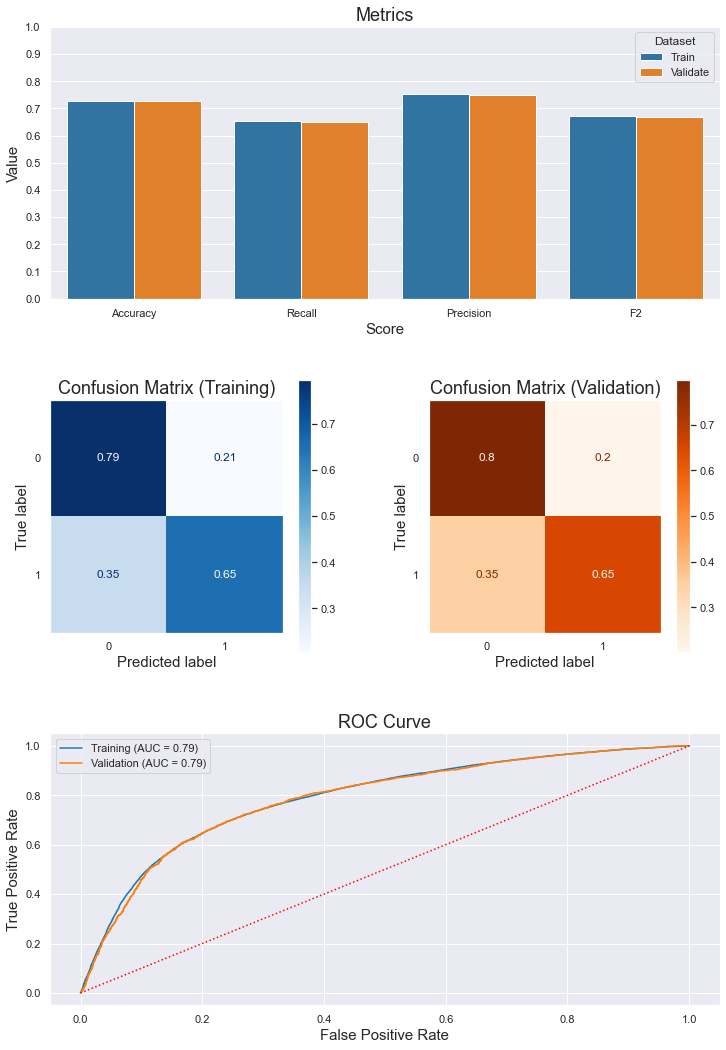

In [159]:
logreg_params = {'C': loguniform(1e-3, 1e3)}

logreg_grid = RandomizedSearchCV(logreg, 
                                 logreg_params, 
                                 n_iter=100, 
                                 scoring=f2, 
                                 n_jobs=-1)
logreg_grid.fit(X_train, y_train)
    
validate(logreg_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [160]:
logreg_best = logreg_grid.best_estimator_
logreg_best

LogisticRegression(C=0.0010368784362276998, max_iter=10000, random_state=0,
                   solver='saga')

## D.8 - K-Nearest Neighbors (KNN)

In [161]:
knn = KNeighborsClassifier(n_jobs=-1)

*The validation curve of `knn` is shown below for increasing values of `n_neighbors`:*

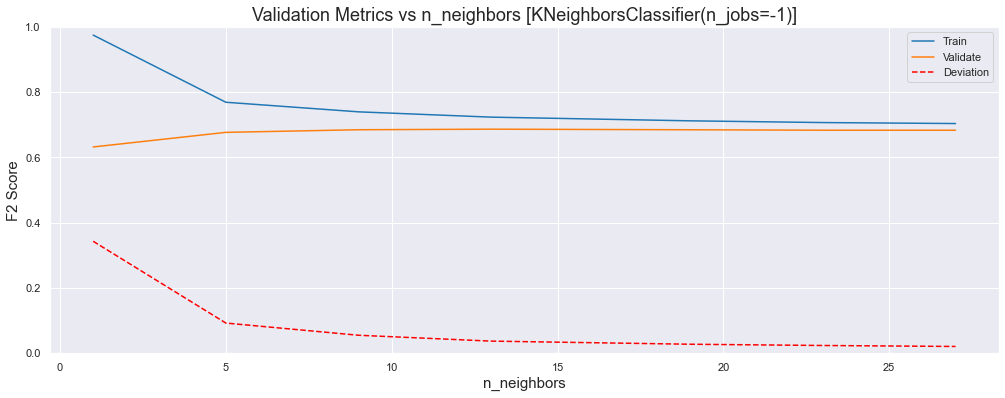

In [162]:
plot_validation_curve(knn, X_train, y_train, param_name='n_neighbors', param_range=[1, 5, 9, 13, 19, 23, 27]) 


*The validation curve above shows that training loss decreases with increasing `n_neighbors`.  However, the training score seems to slowly decrease while the validation score seems to slowly increse, that is, they seem to be converging. The training loss becomes negligible at a value near 21, so this will be chosen for the value of the parameter. Using this value for `n_neighbors`, a grid search will be performed to find the optimal power of the Minkowski distance (parameter `p`).*

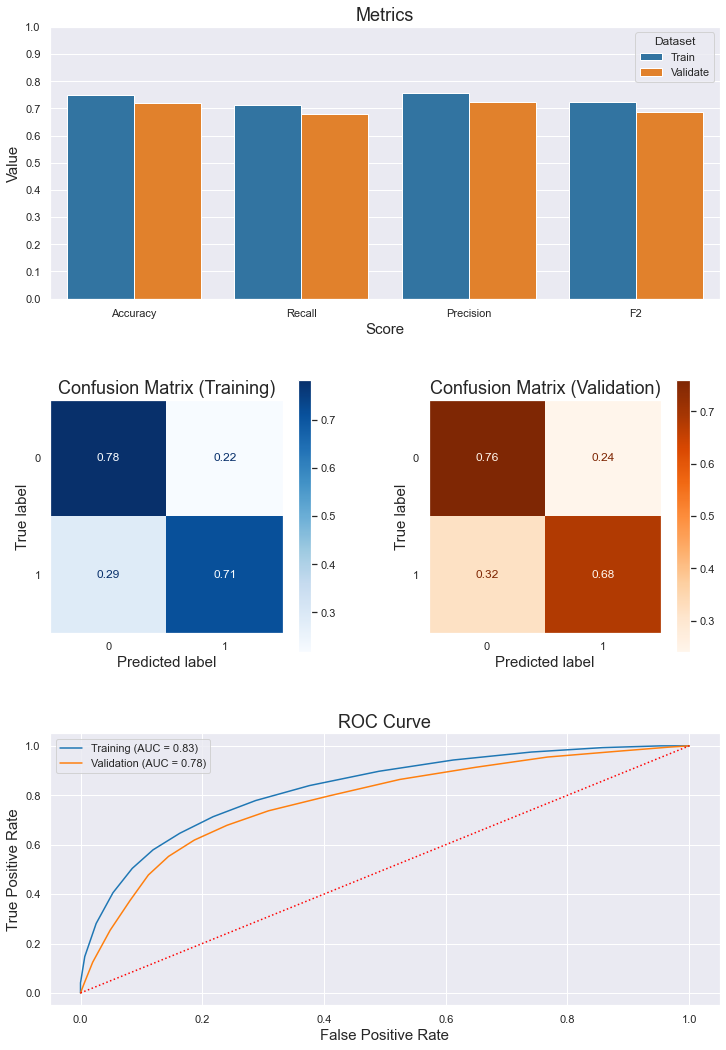

In [171]:
knn_params = {'n_neighbors': [21], 
              'p': [1, 2, 3]}

knn_grid = GridSearchCV(knn, param_grid=knn_params, scoring=f2)
knn_grid.fit(X_train, y_train)

validate(knn_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [174]:
knn_best = knn_grid.best_estimator_
knn_best

KNeighborsClassifier(n_jobs=-1, n_neighbors=21, p=3)

## D.9 - Bagging Classifier (*KNN* Base Estimator)

*The `knn_best` model above is overfit to the training data. In order to reduce variance, this model will be fit to random subsets of the training data using a `BaggingClassifier`. A parameter grid that varies the number of samples and features used to train each base estimator will be searched in order to find the optimal ensemble.*

In [ ]:
bagged_knn = BaggingClassifier(knn_best, random_state=0, n_jobs=-1)

bagged_knn_params = {'n_estimators': [10, 20, 30],
                     'max_samples': [0.5, 0.75, 1],
                     'max_features': [0.5, 0.75, 1],
                     'bootstrap_features': [True, False]}

bagged_knn_grid = GridSearchCV(bagged_knn,
                               bagged_knn_params,
                               scoring=f2,
                               n_jobs=-1)

bagged_knn_grid.fit(X_train, y_train)

In [176]:
bagged_knn_best = bagged_knn_grid.best_estimator_
bagged_knn_best

BaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=21,
                                                      p=3),
                  bootstrap_features=True, max_features=0.5, max_samples=0.75,
                  n_jobs=-1, random_state=0)

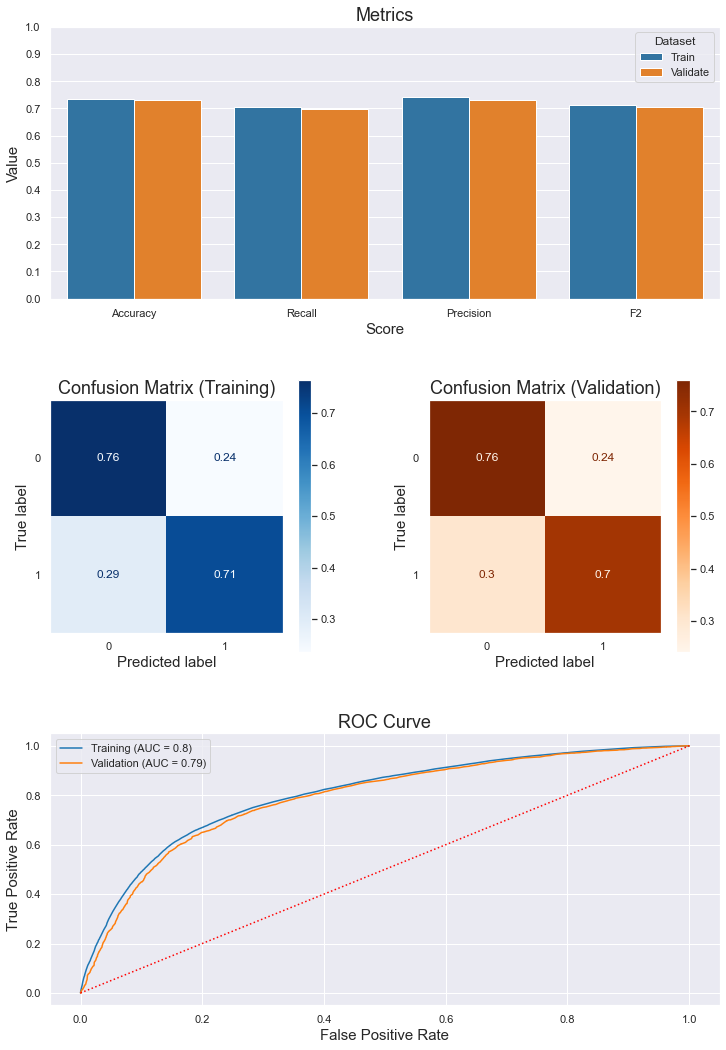

In [177]:
validate(bagged_knn_best, X_train, X_validate, y_train, y_validate)

# E. *Results*

## E.1 - Feature Importances

*The impurity-based and permutation-based feature importances (with respect to recall and precision) that were extracted from `rfc_bestMaxDepth_2` and `rfc_bestMinSamplesLeaf_2` are shown below:*

<center><img src="images/feature-importances-2.png" width='1000'></center>

The updated feature importances shown above indicate that creating the `obese` and `hypertension` features somewhat decreased the overall loss in recall (as calculated by permutating features). However, the problem of features being detrimental to recall persists. Also, the `hypertension` column itself became detrimental to both recall and accuracy, and possibly should have been removed. This strongly indicates that engineering the `bp_categories` columns was unwise.

*Overall the most important features are:*
> - *Systolic Blood Pressure (`bp_hi`)*
> - *Cholesterol Level (`cholesterol_normal`, `cholesterol_high`, and `cholesterol_very-high`)*
> - *Age (`age`)*
> - *Body Mass Index (`bmi`)*
> - *Diastolic Blood Pressure (`bp_lo`)*
> - *Glucose Level (`glucose_normal`, `glucose_very-high`)*

## E.2 - Validating Models Against the Testing Set

In [184]:
from classifier_utils import get_val_metrics, f2_score
from sklearn.metrics import recall_score, accuracy_score, precision_score 

In [187]:
def get_evaluation_metrics(estimator):
    estimator.fit(X_train, y_train)
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)

    metrics = {'Train':{}, 'Test': {}}
    for score_name, score_func in [('Accuracy', accuracy_score), ('Recall', recall_score), ('Precision', precision_score), ('F2', f2_score)]:
        if score_name == 'Precision' or score_name == 'Recall':
            metrics['Train'].update({score_name: round(score_func(y_train, y_train_pred, average='binary'), 3)})
            metrics['Test'].update({score_name: round(score_func(y_test, y_test_pred, average='binary'), 3)})
        else:
            metrics['Train'].update({score_name: round(score_func(y_train, y_train_pred), 3)})
            metrics['Test'].update({score_name: round(score_func(y_test, y_test_pred), 3)})
    return pd.DataFrame(metrics)

*The validation metrics for predictions against the test (hold-out) set for each model is shown below:*

### *Randomized Forest (Optimized for `max_depth`)*

The validation metrics `rfc_bestMaxDepth` indicate that:
> - *out of all the patients that did not have cardiovascular disease, $82\%$ of them were predicted correctly*
> - *out of all the patients that did have cardiovascular disease, $65\%$ of them were predicted correctly*
> - *the model generalizes well to the training data (overfitting has not occured)*

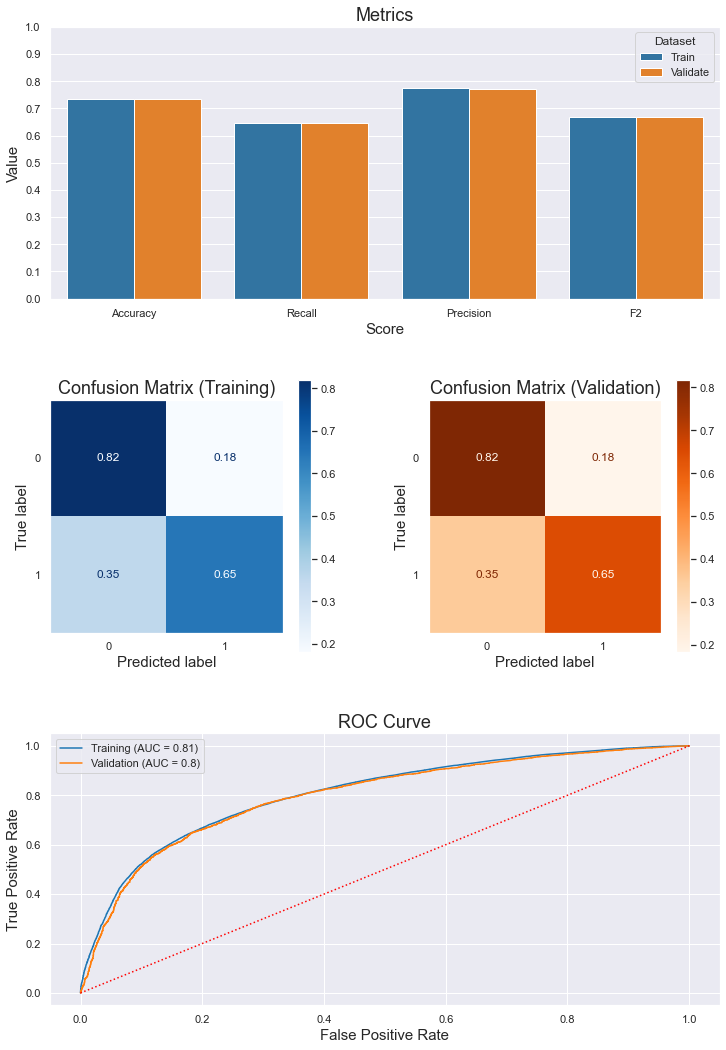

In [178]:
rfc_bestMaxDepth = rfc_bestMaxDepth_2
validate(rfc_bestMaxDepth, X_train, X_test, y_train, y_test)

In [196]:
rfc_bestMaxDepth_metrics = get_evaluation_metrics(rfc_bestMaxDepth)
rfc_bestMaxDepth_metrics

,Train,Test
Accuracy,0.735,0.734
Recall,0.647,0.647
Precision,0.773,0.773
F2,0.669,0.669


### *Randomized Forest (Optimized for `min_samples_leaf`)*

The validation metrics for `rfc_bestMinSamplesLeaf` indicate that:
> - *out of all the patients that did not have cardiovascular disease, $80\%$ of them were predicted correctly*
> - *out of all the patients that did have cardiovascular disease, $67\%$ of them were predicted correctly*
> - *the model generalizes well to the training data (overfitting has not occured)*

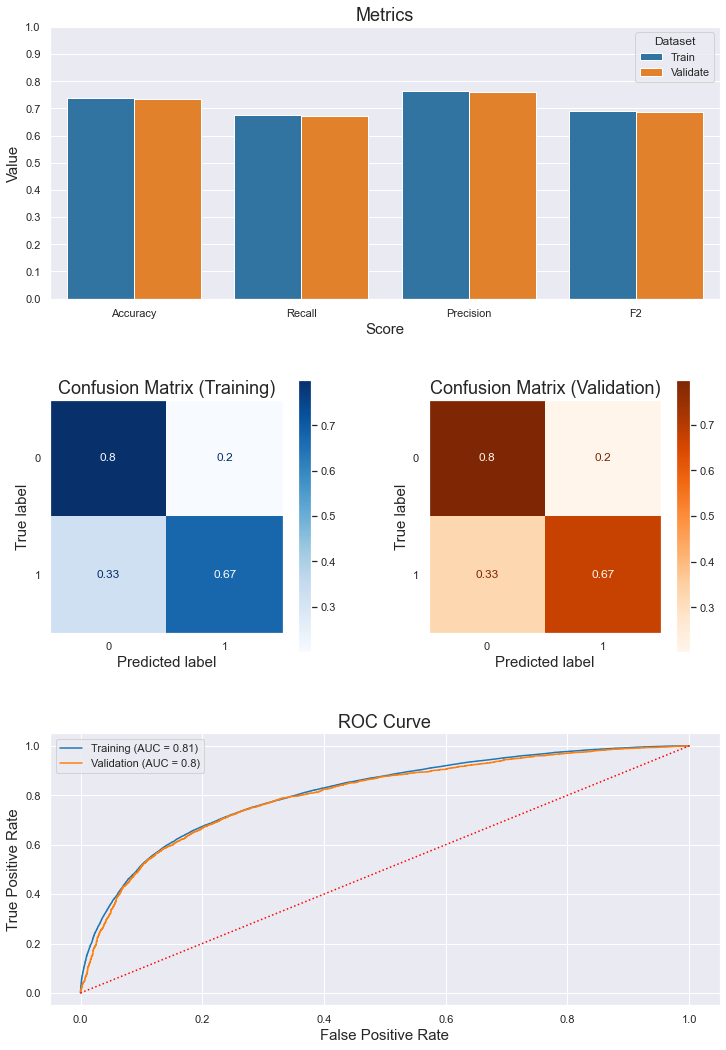

In [179]:
rfc_bestMinSamplesLeaf = rfc_bestMinSamplesLeaf_2

validate(rfc_bestMinSamplesLeaf, X_train, X_test, y_train, y_test)

In [191]:
rfc_bestMinSamplesLeaf_metrics = get_evaluation_metrics(rfc_bestMinSamplesLeaf)
rfc_bestMinSamplesLeaf_metrics

,Train,Test
Accuracy,0.738,0.736
Recall,0.674,0.672
Precision,0.762,0.761
F2,0.690,0.688


### *Logistic Regression*

The validation metrics for `logreg_best` indicate that:
> - *out of all the patients that did not have cardiovascular disease, $79\%$ of them were predicted correctly*
> - *out of all the patients that did have cardiovascular disease, $65\%$ of them were predicted correctly*
> - *the model generalizes well to the training data (overfitting has not occured)*

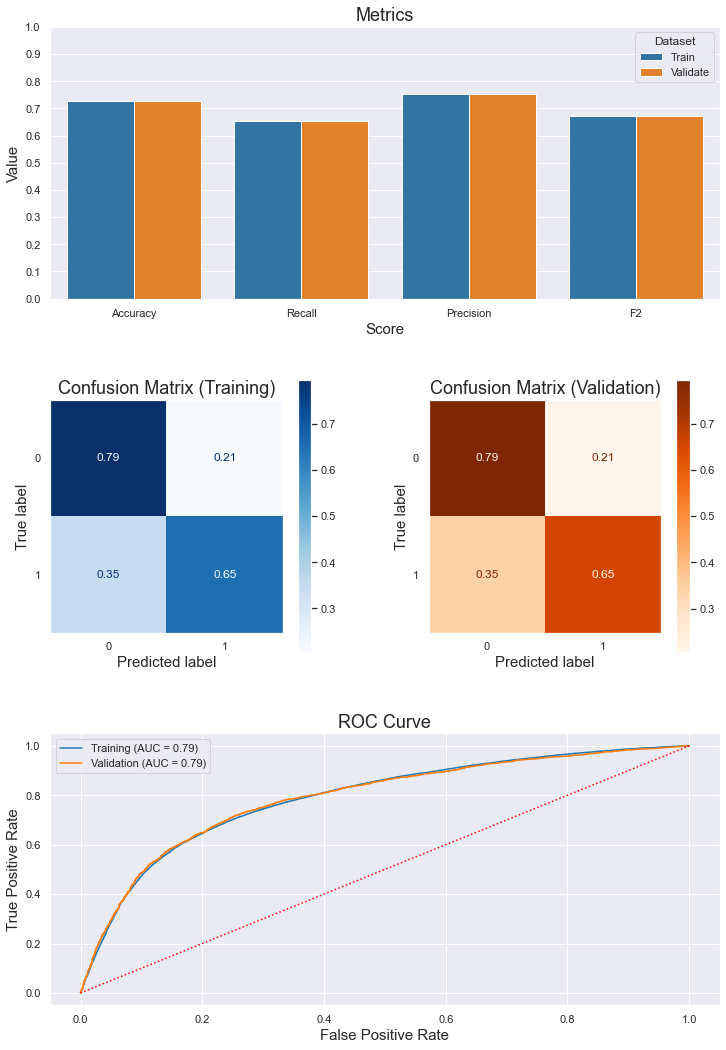

In [180]:
validate(logreg_best, X_train, X_test, y_train, y_test)

In [197]:
logreg_best_metrics = get_evaluation_metrics(logreg_best)
logreg_best_metrics

,Train,Test
Accuracy,0.726,0.726
Recall,0.653,0.654
Precision,0.752,0.753
F2,0.671,0.672


### *K-Nearest Neighbors (KNN)*

The validation metrics below indicate that:
> - *out of all the patients that did not have cardiovascular disease, $76\%$ of them were predicted correctly*
> - *out of all the patients that did have cardiovascular disease, $69\%$ of them were predicted correctly*
> - *there is a noticeable decrease in all scores when evaluated against the training set (slight overfitting has occured)*

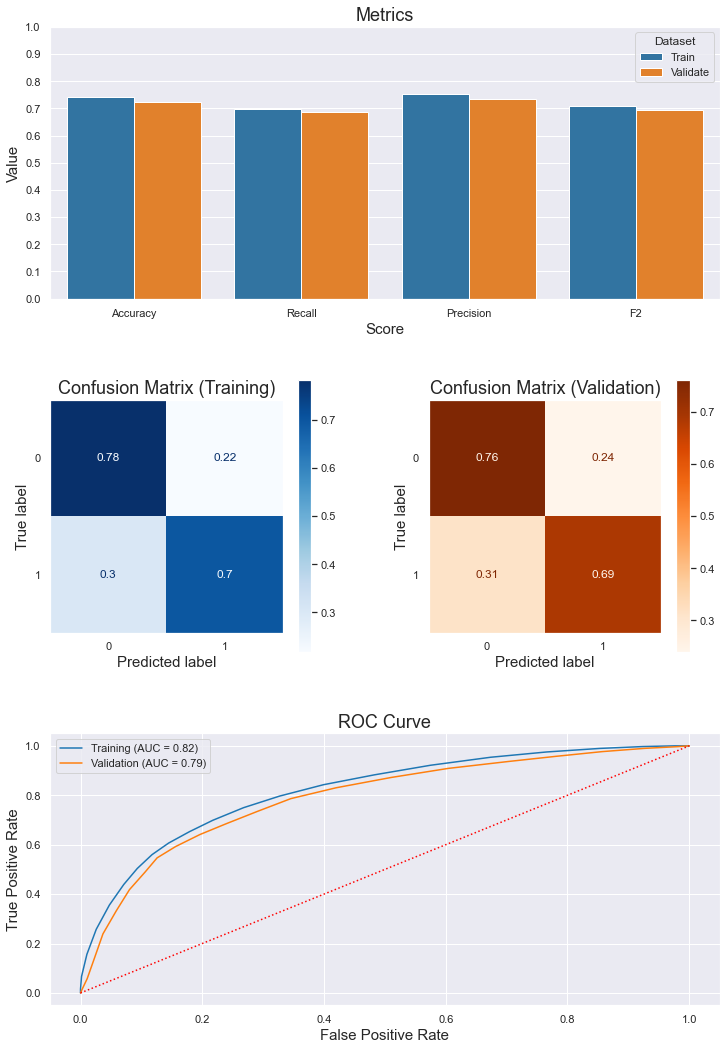

In [181]:
validate(knn_best, X_train, X_test, y_train, y_test)

In [193]:
knn_best_metrics = get_evaluation_metrics(knn_best)
knn_best_metrics

,Train,Test
Accuracy,0.742,0.724
Recall,0.699,0.685
Precision,0.754,0.733
F2,0.709,0.694


### *Bagging Classifier (KNN Base Estimator)*

The validation metrics below indicate that:
> - *out of all the patients that did not have cardiovascular disease, $76\%$ of them were predicted correctly*
> - *out of all the patients that did have cardiovascular disease, $70\%$ of them were predicted correctly*
> - *the model generalizes well to the training data (overfitting has not occured)*

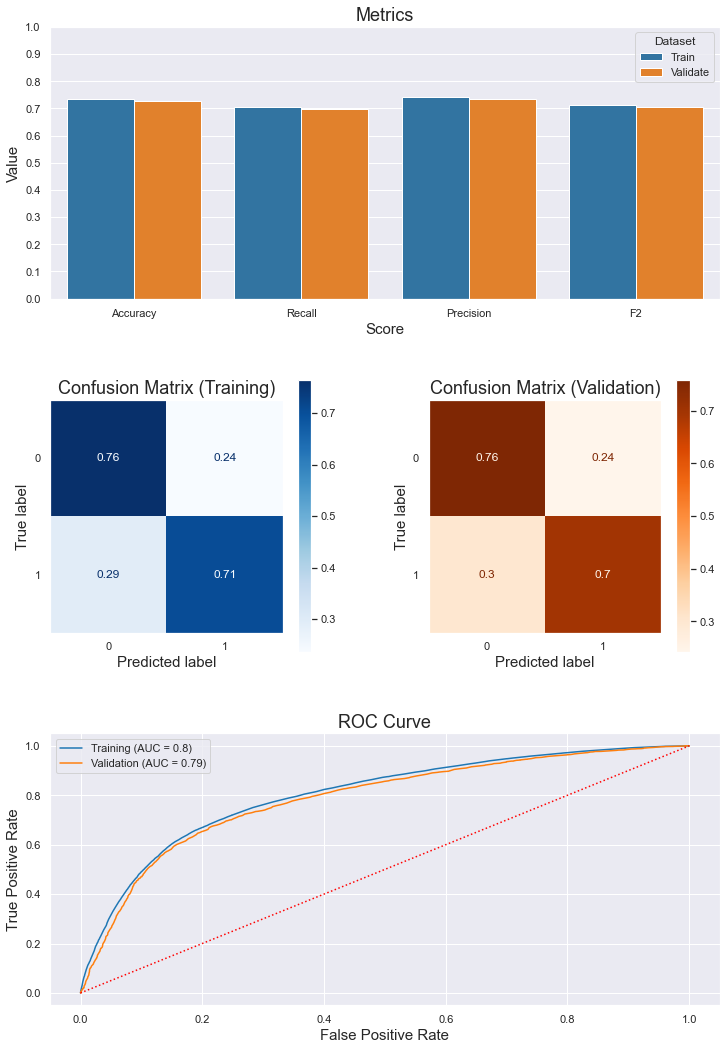

In [182]:
validate(bagged_knn_best, X_train, X_test, y_train, y_test)

In [194]:
bagged_knn_best_metrics = get_evaluation_metrics(bagged_knn_best)
bagged_knn_best_metrics

,Train,Test
Accuracy,0.736,0.729
Recall,0.706,0.698
Precision,0.740,0.735
F2,0.713,0.705


## E.3 - Choosing the Best Model

*The validation metrics for all models against the training set is shown in the table below:*

In [201]:
all_metrics = pd.concat([rfc_bestMaxDepth_metrics['Test'], 
                         rfc_bestMinSamplesLeaf_metrics['Test'], 
                         logreg_best_metrics['Test'], 
                         knn_best_metrics['Train'],
                         bagged_knn_best_metrics['Train']],
                        axis=1)
all_metrics.columns = ['Randomized Forest [best max_depth]', 'Randomized Forest [best min_samples_leaf]', 'Logistic Regression', 'K-Nearest Neighbors', 'Bagging Classifier [KNN base estimator]']

all_metrics

,Randomized Forest [best max_depth],Randomized Forest [best min_samples_leaf],Logistic Regression,K-Nearest Neighbors,Bagging Classifier [KNN base estimator]
Accuracy,0.734,0.736,0.726,0.742,0.736
Recall,0.647,0.672,0.654,0.699,0.706
Precision,0.773,0.761,0.753,0.754,0.740
F2,0.669,0.688,0.672,0.709,0.713


# F. *Conclusion*

> *The above table table indicates that the Bagging Classifier with a KNN base estimator (`bagged_knn_best`) performed best overall when predicting against the training set, with a score of $0.7$ or higher for all metrics. Most importantly, this model had the highest recall, with a score of $0.706$. Therefore, `bagged_knn_best` will be chosen for further development.*

Although chosen as the best candidate, `bagged_knn_best` is not ready for use as a screening tool for cardiovascular disease. This is due to the fact that its recall is still unacceptably low, and needs to be improved. That is, its recall score of $0.706$ implies that 3 out of 10 sick patients will be incorrectly classified as healthy. Given the potentially life-threatening consequences of such a misclassification, the rate at which it ocurrs must be reduced (i.e. recall must be increased). In terms of its utility as a screening tool, an accuracy of $0.736$ is also too low, and needs improvement.

> *The following features were determined to be of primary importance when predicting cardiovascular disease, and therefore must be used in future iterations of this model:*
> - *Systolic Blood Pressure (`bp_hi`)*
> - *Cholesterol Level (`cholesterol_normal`, `cholesterol_high`, and `cholesterol_very-high`)*
> - *Age (`age`)*
> - *Body Mass Index (`bmi`)*
> - *Diastolic Blood Pressure (`bp_lo`)*
> - *Glucose Level (`glucose_normal`, `glucose_very-high`)*

With respect to the `cholesterol` and `glucose` features however, effort needs to be made to collect this data as continuous measurements, instead of being crudely classified into 3 levels. Similarly, features like `smoke`, `alcohol`, and `active` are too vague to be useful as predictive variables because of their binary format. If a patient is to answer these questions, they should respond with a quantity instead of a yes/no answer. This would benefit the accuracy of the models and is likely to improve recall. 

# G. *Limitations & Ideas for Further Analysis*

Finding additional features and obtaining more data on which to train the model are both vitally important for improvement. It would be prudent to access the API of awidely-used EHR system and start gathering data that is the same as, and similar to, the features used in this analysis. In conjunction with this, it is highly recommended that a consultant with domain-specific knowledge (i.e. a cardiologist) be brought in to help make sense of features, point out highly correlated features, recommend new features, and aid with feature selection.

Additionally, combining the models into a single classifier by feeding them into ensemble methods shuch as a Voting Classifier or Stacking Classifier could have improved results. 

Finally, narrowing the scope of the target label to a specific disease (i.e. heart disease or stroke) instead of the entire class of cardiovascular diseases would be highly beneficial, as this would allow us to select features specific to that disease, instead of trying to find features that contribute to cardiovascular disease in general.